# Lending Club Case Study - Exploratory Data Analysis

### This EDA is a smaller sample of the total lending data available on kaggle 
### Individual Class Performance be be based on EDA done on the complete dataset which is imported in 1_FINAL-Credit Risk Modeling - Preparation.ipynb code 

You work for a consumer finance company **Lending Club** which specialises in lending various types of loans to urban customers. This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. When the company receives a loan application, the company has to **make a decision for loan approval based on the applicant’s profile.**
When a person applies for a loan, there are two types of decisions that could be taken by the company:

**1. Loan accepted:** If the company approves the loan, there are 3 possible scenarios described below:

**Fully paid:** Applicant has fully paid the loan (the principal and the interest rate)

**Current:** Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

**Charged-off:** Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

**2. Loan rejected:** The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

### Business Objectives:
Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders.

Objective is to i**dentify the risky loan applicants at the time of loan application** so that such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, **to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.**  The company can utilise this knowledge for its portfolio and risk assessment. And thus minimise the risk of losing money while lending to customers.

## Exploratory Data Analysis

### Data

We have been provided with the **Private Data** of Lending Club.
<br>The complete **loan data** for all loans issued through the time period **2007 to 2011**.

We also have a data dictionary which describes the meaning of these variables.

### Assumption: 
<br>The loan request if graded by LC and then listed for loan. Now it is up to the investor who decides which loan listing to invest in looking at the loan detail and borrowers information.
<br>Only those variables be chosen for analysis that will be available to the investor at the time of deciding whether to invest in a loan request or not.

## Exploratory Data Analysis

Let's start with importing all the required libraries for the analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#style.use('fivethirtyeight')
sns.set(style='whitegrid')
#sns.set(style='fivethirtyeight')

Reading the loan data file.

In [32]:
loan = pd.read_csv('loan.csv',encoding = "ISO-8859-1", low_memory=False)

In [33]:
loan.shape

(39717, 111)

In [34]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


---
#  Data Cleaning

---

Missing values per column expressed as % of total number of values

In [35]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing.loc[missing > 0]

emp_title                       6.19
emp_length                      2.71
desc                           32.58
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

There are many columns in the data with 100% missing values. Lets remove all the columns with more than 50% missing values.

In [36]:
columns_with_missing_values = list(missing[missing >= 50].index)

len(columns_with_missing_values)

57

There were **21 columns** with more than 50% values as missing. Removing such columns as these columns clearly add noise and wont help in analysis.

In [37]:
loan = loan.drop(columns_with_missing_values,axis=1)
loan.shape

(39717, 54)

After removing such columns. 54 columns remain.
<br> Let's examin further for missing values.

In [38]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing[missing != 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

In [39]:
print("unique emp_title : %d"  % len(loan.emp_title.unique()))
print("unique emp_length : %d"  % len(loan.emp_length.unique()))
print("unique title : %d"  % len(loan.title.unique()))
print("unique revol_util : %d"  % len(loan.revol_util.unique()))
print("unique title : %d"  % len(loan.title.unique()))
print("unique last_pymnt_d : %d"  % len(loan.last_pymnt_d.unique()))
print("unique last_credit_pull_d : %d"  % len(loan.last_credit_pull_d.unique()))
print("unique collections_12_mths_ex_med : %d"  % len(loan.collections_12_mths_ex_med.unique()))
print("unique chargeoff_within_12_mths : %d"  % len(loan.chargeoff_within_12_mths.unique()))
print("unique pub_rec_bankruptcies : %d"  % len(loan.pub_rec_bankruptcies.unique()))
print("unique tax_liens : %d"  % len(loan.tax_liens.unique()))

unique emp_title : 28821
unique emp_length : 12
unique title : 19616
unique revol_util : 1090
unique title : 19616
unique last_pymnt_d : 102
unique last_credit_pull_d : 107
unique collections_12_mths_ex_med : 2
unique chargeoff_within_12_mths : 2
unique pub_rec_bankruptcies : 4
unique tax_liens : 2


Columns emp_length, collections_12_mths_ex_med, chargeoff_within_12_mths, pub_rec_bankruptcies and tax_liens are clearly **Categorical** with values belonging to a range.

Let's take a look at all the different values of these Categorical columns

In [40]:
loan.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [41]:
loan.collections_12_mths_ex_med.unique()

array([ 0., nan])

Next, lets look at the pub_rec_bankruptcies categorical column with 1.76% missing data. It tells us about the past number of public record bankruptcies of that borrower.

pub_rec_bankruptcies can be seen to have taking values like [0,1,2]. Almost 35000 records with 0 record of bankrupcies, 1500 records having one bankrupcies case and 7 records with two bankrupcies case.
<br> While we could have taken the mode representation of the data which is 0 bankrupcies to impute the missing values. But, we decide to remove the rows instead so that we ensure we dont add any bais to the data.

In [42]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2) 
missing[missing != 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

Next, the columns emp_title, emp_length have 6.19% and 2.71% missing value. These columns have information about the customer/borrower like their job title and their employment length in years.
Let's remove the rows with nan/blank values for these varaibles.


In [43]:
loan=loan[~loan.emp_title.isnull()]
loan=loan[~loan.emp_length.isnull()]

In [44]:
loan.shape

(37202, 54)

In [45]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2) 
missing[missing != 0]

desc                          32.44
title                          0.02
revol_util                     0.12
last_pymnt_d                   0.17
collections_12_mths_ex_med     0.13
chargeoff_within_12_mths       0.13
pub_rec_bankruptcies           1.76
tax_liens                      0.09
dtype: float64

In [46]:
missing =round(100*(loan.isnull().sum()/len(loan.id)), 2) 
missing[missing != 0]

desc                          32.44
title                          0.02
revol_util                     0.12
last_pymnt_d                   0.17
collections_12_mths_ex_med     0.13
chargeoff_within_12_mths       0.13
pub_rec_bankruptcies           1.76
tax_liens                      0.09
dtype: float64

Now, we have now reduced the data set to have with little or no missing values. Let's write it into another file and use that file for further analysis.

In [47]:
loan.to_csv('clean_loan.csv', encoding='utf-8', index=False)

#### Further shortlist and narrow down the columns for analysis

Let's now analyse all the columns in the resulted dataframe and find only the ones with are required or make sense  for the analysis.

In [48]:
clean_loan = loan[:]#pd.read_csv('clean_loan.csv',encoding='utf-8')

In [49]:
clean_loan.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
initial_list_status               1
collections_12_mths_ex_med        1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        80
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

A data dictionary file is also been provided along with the loan data. This file gives a brief describtion about all the columns of the loan transaction file.
<br> Let's use this file to get a better understanding of the  columns we are left with.
<br> This will help to further narrow down on the columns.

There are a few columns having a single unique value or all unique values. These may have nothing much to contribute to the analysis i.e. columns which are far from being the driving columns towards loan default. Some other columns are redundant.

These columns are:
1. __id__
:<br>is a random number given to the loan, does not contribute to analysis
2. __member_id__
:<br>is a random number given to the member, does not contribute to analysis
3. __pymnt_plan__
:<br> value for entire dataset is 'n', therefore can be removed.
4. __url__
:<br>is a URL for LC page for corresponding to each memberid, nothing to do with loan default.
5. __zip_code__
:<br>first 3 digits of the 5 digit zip code are visible, also is redundant with addr_state, does not contribute to analysis
6. __initial_list_status__
:<br> value for entire dataset is 'f' out of the possible values, therefore can be removed.
7. __policy_code__
:<br> value for entire dataset is '1', indicating all are publicly available, therefore nothing to contribute for analysis, to be removed.
8. __application_type__
:<br>value for entire dataset is 'INDIVIDUAL', indicating all are individual applications not joint, therefore nothing to contribute for analysis, to be removed.
9. __acc_now_delinq__
:<br>value for entire dataset is '0', therefore can be removed.
10. __delinq_amnt__
:<br>value for entire dataset is '0', therefore can be removed.
11. __funded_amnt__
:<br> value for this column is almost equivalent to loan_amnt. removing to avoid multi colinearity.
12. __funded_amnt_inv__
:<br> value for this column is almost equivalent to funded_amnt. removing to avoid multi colinearity. Also this wont be available at the time of decision making of funding a loan.


Dropping the above columns from the clean_loan dataframe.

In [50]:
columns_tobe_dropped = ['id','member_id','funded_amnt','funded_amnt_inv','pymnt_plan','url','zip_code','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt',]
clean_loan= clean_loan.drop(columns_tobe_dropped,axis=1)

In [51]:
clean_loan.shape

(37202, 42)

Columns for analysis reduced to 38 columns.

Next, let's standardize the precision of the data. There are certain columns with need rounding of the values up until two decimal places.<br>
These columns are:
1. total_pymnt
2. total_rec_late_fee
3. collection_recovery_fee

In [52]:
clean_loan.total_pymnt.value_counts().tail()

16188.075290    1
4040.370724     1
4483.180000     1
2785.853024     1
9195.263334     1
Name: total_pymnt, dtype: int64

In [53]:
clean_loan.total_rec_late_fee.value_counts().tail()

34.177250    1
29.948287    1
67.606386    1
24.330000    1
19.890000    1
Name: total_rec_late_fee, dtype: int64

In [54]:
clean_loan.collection_recovery_fee.value_counts().tail()

608.3390    1
8.1220      1
56.0826     1
245.9034    1
0.2300      1
Name: collection_recovery_fee, dtype: int64

In [55]:
clean_loan.total_pymnt= round(clean_loan.total_pymnt,2)
clean_loan.total_rec_late_fee= round(clean_loan.total_rec_late_fee,2)
clean_loan.collection_recovery_fee= round(clean_loan.collection_recovery_fee,2)

Next, there are few columns which denote date or month information but are of the type object in the dataframe. Let's change the dtype of all such columns to datetime. Doing so will help in further using these column values to its best for analysis.<br>
These columns are:
1. issue_d
2. earliest_cr_line
3. last_pymnt_d
4. last_credit_pull_d

In [56]:
datetime_colmns=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
clean_loan[datetime_colmns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37202 entries, 1 to 39716
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   issue_d             37202 non-null  object
 1   earliest_cr_line    37202 non-null  object
 2   last_pymnt_d        37138 non-null  object
 3   last_credit_pull_d  37202 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


Converting the dtype of these columns to datetime

In [57]:
clean_loan.issue_d = pd.to_datetime(clean_loan.issue_d, format='%b-%y')
clean_loan.earliest_cr_line = pd.to_datetime(clean_loan.earliest_cr_line, format='%b-%y')
clean_loan.last_pymnt_d = pd.to_datetime(clean_loan.last_pymnt_d, format='%b-%y')
clean_loan.last_credit_pull_d = pd.to_datetime(clean_loan.last_credit_pull_d, format='%b-%y')

In [58]:
clean_loan[datetime_colmns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37202 entries, 1 to 39716
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   issue_d             37202 non-null  datetime64[ns]
 1   earliest_cr_line    37202 non-null  datetime64[ns]
 2   last_pymnt_d        37138 non-null  datetime64[ns]
 3   last_credit_pull_d  37202 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.4 MB


Dropping Duplicated rows if any,

In [59]:
clean_loan.shape

(37202, 42)

In [60]:
clean_loan=clean_loan.drop_duplicates()

In [61]:
clean_loan.shape

(37202, 42)

Next, there are few columns expressing % like int_rate and revol_util.
<br> These has values like '15.27%' and '9.40%'.
<br>Further these columns has dtype as 'object'. Let's convert these columns to have just the value withoout '%' and typecast it to float.

In [62]:
clean_loan.int_rate.describe()

count      37202
unique       368
top       10.99%
freq         901
Name: int_rate, dtype: object

In [63]:
clean_loan.revol_util.describe()

count     37156
unique     1082
top          0%
freq        883
Name: revol_util, dtype: object

In [64]:
clean_loan['int_rate'] = clean_loan['int_rate'].str.strip('%').astype('float')
clean_loan['revol_util'] = clean_loan['revol_util'].str.strip('%').astype('float')

In [65]:
clean_loan[['int_rate','revol_util']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37202 entries, 1 to 39716
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   int_rate    37202 non-null  float64
 1   revol_util  37156 non-null  float64
dtypes: float64(2)
memory usage: 871.9 KB


Let us now take a look at the __emp_length__ column.

In [66]:
clean_loan.emp_length.value_counts()

10+ years    8535
2 years      4273
< 1 year     4201
3 years      3982
4 years      3357
5 years      3177
1 year       3134
6 years      2158
7 years      1722
8 years      1435
9 years      1228
Name: emp_length, dtype: int64

According to the data_dictionary file description for this field,<br> emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
<br> Let's convert the column to have values between 0 and 10.

In [67]:
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [68]:
clean_loan = clean_loan.replace({"emp_length": emp_length_dict })

In [69]:
clean_loan.emp_length.value_counts()

10    8535
2     4273
0     4201
3     3982
4     3357
5     3177
1     3134
6     2158
7     1722
8     1435
9     1228
Name: emp_length, dtype: int64

The column term: The number of payments on the loan. Values are in months and can be either 36 or 60.
<br> removing the months string from within the column term.

In [70]:
clean_loan.term.value_counts()

 36 months    27125
 60 months    10077
Name: term, dtype: int64

In [71]:
clean_loan['term'] = clean_loan.term.apply(lambda x: x.split()[0])

In [72]:
clean_loan.term.value_counts()

36    27125
60    10077
Name: term, dtype: int64

**earliest_cr_line:** The month the borrower's earliest reported credit line was opened. Let's split the date column into earliest_cr_line_month and earliest_cr_line_year

Lets split the available date into month and year column.

In [73]:
clean_loan['earliest_cr_line_month'] = clean_loan['earliest_cr_line'].dt.month
clean_loan['earliest_cr_line_year'] = clean_loan['earliest_cr_line'].dt.year

In [74]:
len(clean_loan[clean_loan['earliest_cr_line_year'] > 2011 ])

50

We see that there are 50 records with the earliest credit line date greater than 2011(which is the max range of the data we have). <br> Lets see the data to understand why.

In [75]:
clean_loan[clean_loan['earliest_cr_line_year'] > 2011 ]['earliest_cr_line_year'].unique()

array([2068, 2067, 2065, 2063, 2066, 2062, 2056, 2046, 2050, 2064, 2054],
      dtype=int64)

This seems to be a result of y2k like error. Year stored in two digits being interpreted as year in 21st century. Let's fix the entries. 

In [76]:
clean_loan.loc[clean_loan['earliest_cr_line_year'] > 2011 , 'earliest_cr_line_year'] = clean_loan['earliest_cr_line_year'] - 100

In [77]:
clean_loan.groupby('earliest_cr_line_year').loan_amnt.count()

earliest_cr_line_year
1946       1
1950       1
1954       1
1956       1
1962       3
1963       4
1964       2
1965       6
1966       7
1967      12
1968      12
1969      23
1970      35
1971      36
1972      37
1973      43
1974      51
1975      59
1976      76
1977      91
1978     131
1979     145
1980     154
1981     160
1982     201
1983     303
1984     366
1985     419
1986     454
1987     576
1988     683
1989     794
1990     970
1991     905
1992     996
1993    1431
1994    1911
1995    2030
1996    2119
1997    2313
1998    2695
1999    2805
2000    3097
2001    2409
2002    1841
2003    1779
2004    1679
2005    1420
2006    1095
2007     674
2008     146
Name: loan_amnt, dtype: int64

**issue_d:** The month which the loan was funded .Lets split the available date into month and year column.

In [78]:
clean_loan['issue_d_month'] = clean_loan['issue_d'].dt.month
clean_loan['issue_d_year'] = clean_loan['issue_d'].dt.year

Writing the ready to analyse data to a csv. We will use this new csv for ease in further analysis.

In [79]:
clean_loan.to_csv('master_loan.csv', encoding='utf-8', index=False)

---
# Analysis

---

Loading the created master data for further anaysis.

In [80]:
master_loan = clean_loan[:] #pd.read_csv('master_loan.csv', encoding='utf-8')

In [81]:
master_loan.shape

(37202, 46)

In [82]:
master_loan.loan_status.value_counts()

Fully Paid     31005
Charged Off     5131
Current         1066
Name: loan_status, dtype: int64

Since we need to understand differences in the features between loans that have been fully paid or charged off. Let's not consider loans that are current. So we only keep the loans with status "Fully Paid" or "Charged Off."

In [83]:
master_loan = master_loan[master_loan['loan_status'].isin(['Fully Paid','Charged Off'])]
master_loan.shape

(36136, 46)

# Univariate and Segmented Univariate Analysis

Define a few methods to aid in plotting graphs

In [84]:

## Wonderful solution to show labels in bar plots - copied from https://stackoverflow.com/a/48372659 and edited
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [85]:
# This function plots a given column buckets against loan_status (default = 'Charged Off')
# The plots are in percentages 
# (absolute numbers do not make sense -> category values can have very different absolute numbers)
# We want to see what are the chances of some category leading to loan default
# Absolute numbers are also printed to assess level of confidence in a % value. 
def plotLoanStatus(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    #print(grp)
    percentages = grp.unstack() * 100 / cnt.T
    #print(percentages)
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    showLabels(ax, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

In [86]:
# This method plots a distribution of target column, and its boxplot against loan_status column
def plot_distribution(dataframe, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(dataframe[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    plt.show()

In [101]:
# This method prints two plots side by side 
# Left one is percentage of a categorical variable in the entire dataset 
# Right one is percentage for Charged Off loans 
# Significant changes in percentage from left to right can indicate a value of interest
def plot_percentages(dataframe, by, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (master_loan[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    showLabels(ax)
    plt.subplot(1, 2, 2)
    #ax = master_loan.groupby('loan_status')['term'].value_counts(normalize=True).loc[:'Charged Off'].plot.bar(color=sns.color_palette('husl', 16))
    values = (master_loan.loc[master_loan['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)
    
    showLabels(ax)

In [88]:
(master_loan['grade'].value_counts(normalize=True)*100).sort_index()

A    25.650321
B    30.252380
C    20.447753
D    13.291455
E     7.009630
F     2.551472
G     0.796989
Name: grade, dtype: float64


---
### **The key column - loan_status**

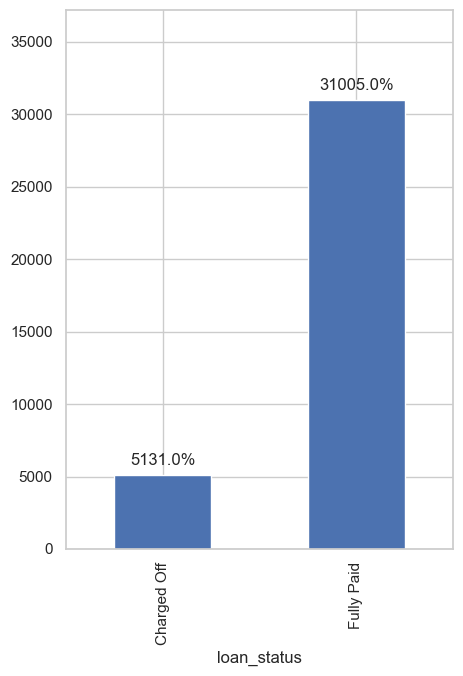

In [89]:
plt.figure(figsize=(5,7))
ax = master_loan.groupby('loan_status').loan_amnt.count().plot.bar()
showLabels(ax)
plt.show()

In [90]:
print("%.2f" % (master_loan.loc[master_loan['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(master_loan)))

14.20


---
<mark>Approximately **14%** of loans in the dataset are **defaulted.**</mark>
<br>Any variable that increases percentage of default to higher than 16.5% should be considered a business risk. 
(16.5 is 18% higher than 13.97 - a large enough increase) 

---

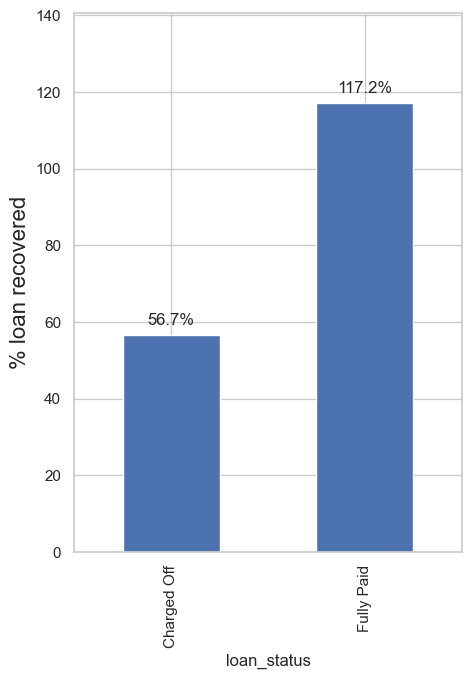

In [91]:
plt.figure(figsize=(5,7))
ax = (master_loan.groupby('loan_status').total_pymnt.sum() * 100 / master_loan.groupby('loan_status').loan_amnt.sum()).plot.bar()
ax.set_ylabel('% loan recovered', fontsize=16)
plt.margins(0.2, 0.2)
showLabels(ax)

<mark>Lending Club only recovers 57% of the loan amount when loans are defaulted. On fully paid up loans, the company makes 17% profit. </mark>

### Let us see graphs of some other important variables 

#### Variable: loan_amnt
Data_Dictionary: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

C:\Users\saras\AppData\Local\Temp\ipykernel_17380\3098875138.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataframe[col])


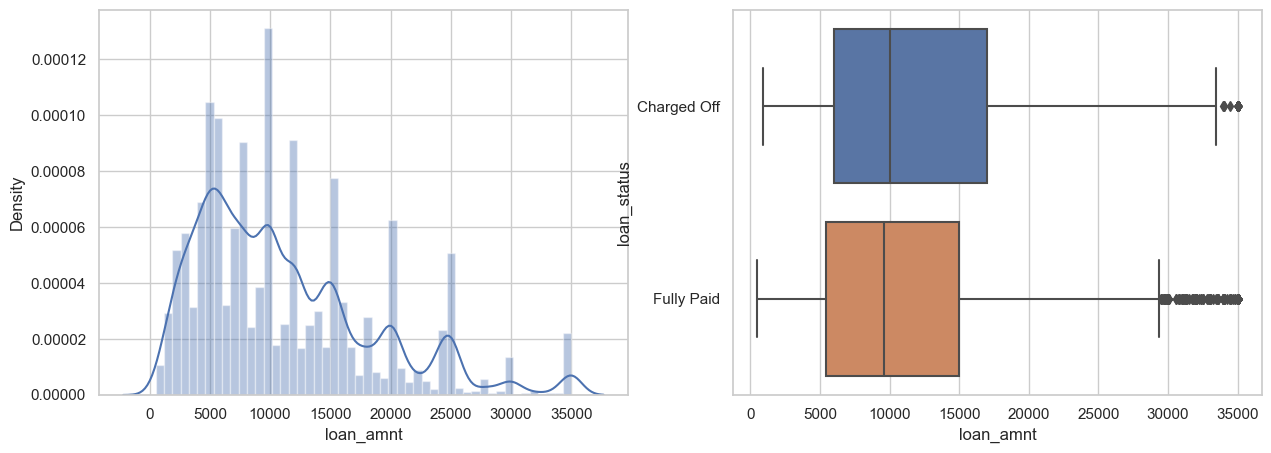

In [92]:
plot_distribution(master_loan, 'loan_amnt')

In [93]:
master_loan.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5131.0,12236.844670,8055.891815,900.0,6000.0,10000.0,17000.0,35000.0
Fully Paid,31005.0,10915.129818,7165.444448,500.0,5400.0,9600.0,15000.0,35000.0


**Observation:**
-  Overall, the applied loan amount distribution is slightly __right-skewed__ with mean greater than the median. Most of the loans granted are below 15000 (75 percentile value)
- Funding amounts see a spike around each 5000 boundary. <mark>We will use 5000 as bucket size for later analysis.</mark>
- Charged off loans are shifted towards higher average loan amount request.

In [94]:
#Create Derived categorical variable
master_loan['loan_amnt_bin'] = pd.cut(master_loan['loan_amnt'], 
                                      [x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])


<Axes: xlabel='loan_amnt_bin', ylabel='% of loans Charged Off'>

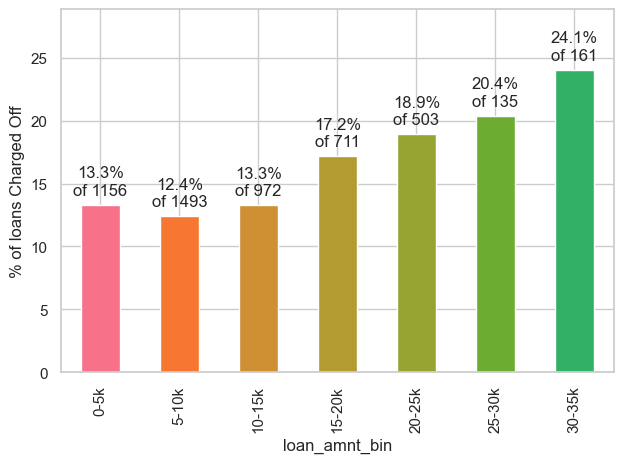

In [95]:
plotLoanStatus(master_loan, 'loan_amnt_bin')

**Observation:**
- The % of charged off loans increases substancially as we go up the loan amount buckets. Most loans are below 20000 amount. The higher loans, though lesser in number, carry a substantially higher risk of default. 

---
#### Other categorical variables distribution
Let's see how some other categorical variables of interest are distributed within the dataset 

In [96]:
def categoricalBarPlots(df, arr):
    rows = int(len(arr)/2)
    for idx, val in enumerate(arr, start=1):
        plt.subplot(rows, 2, idx)
        ax = df.groupby(val).loan_amnt.count().plot.bar(color=sns.color_palette('husl', 16))
        showLabels(ax)

    plt.tight_layout()

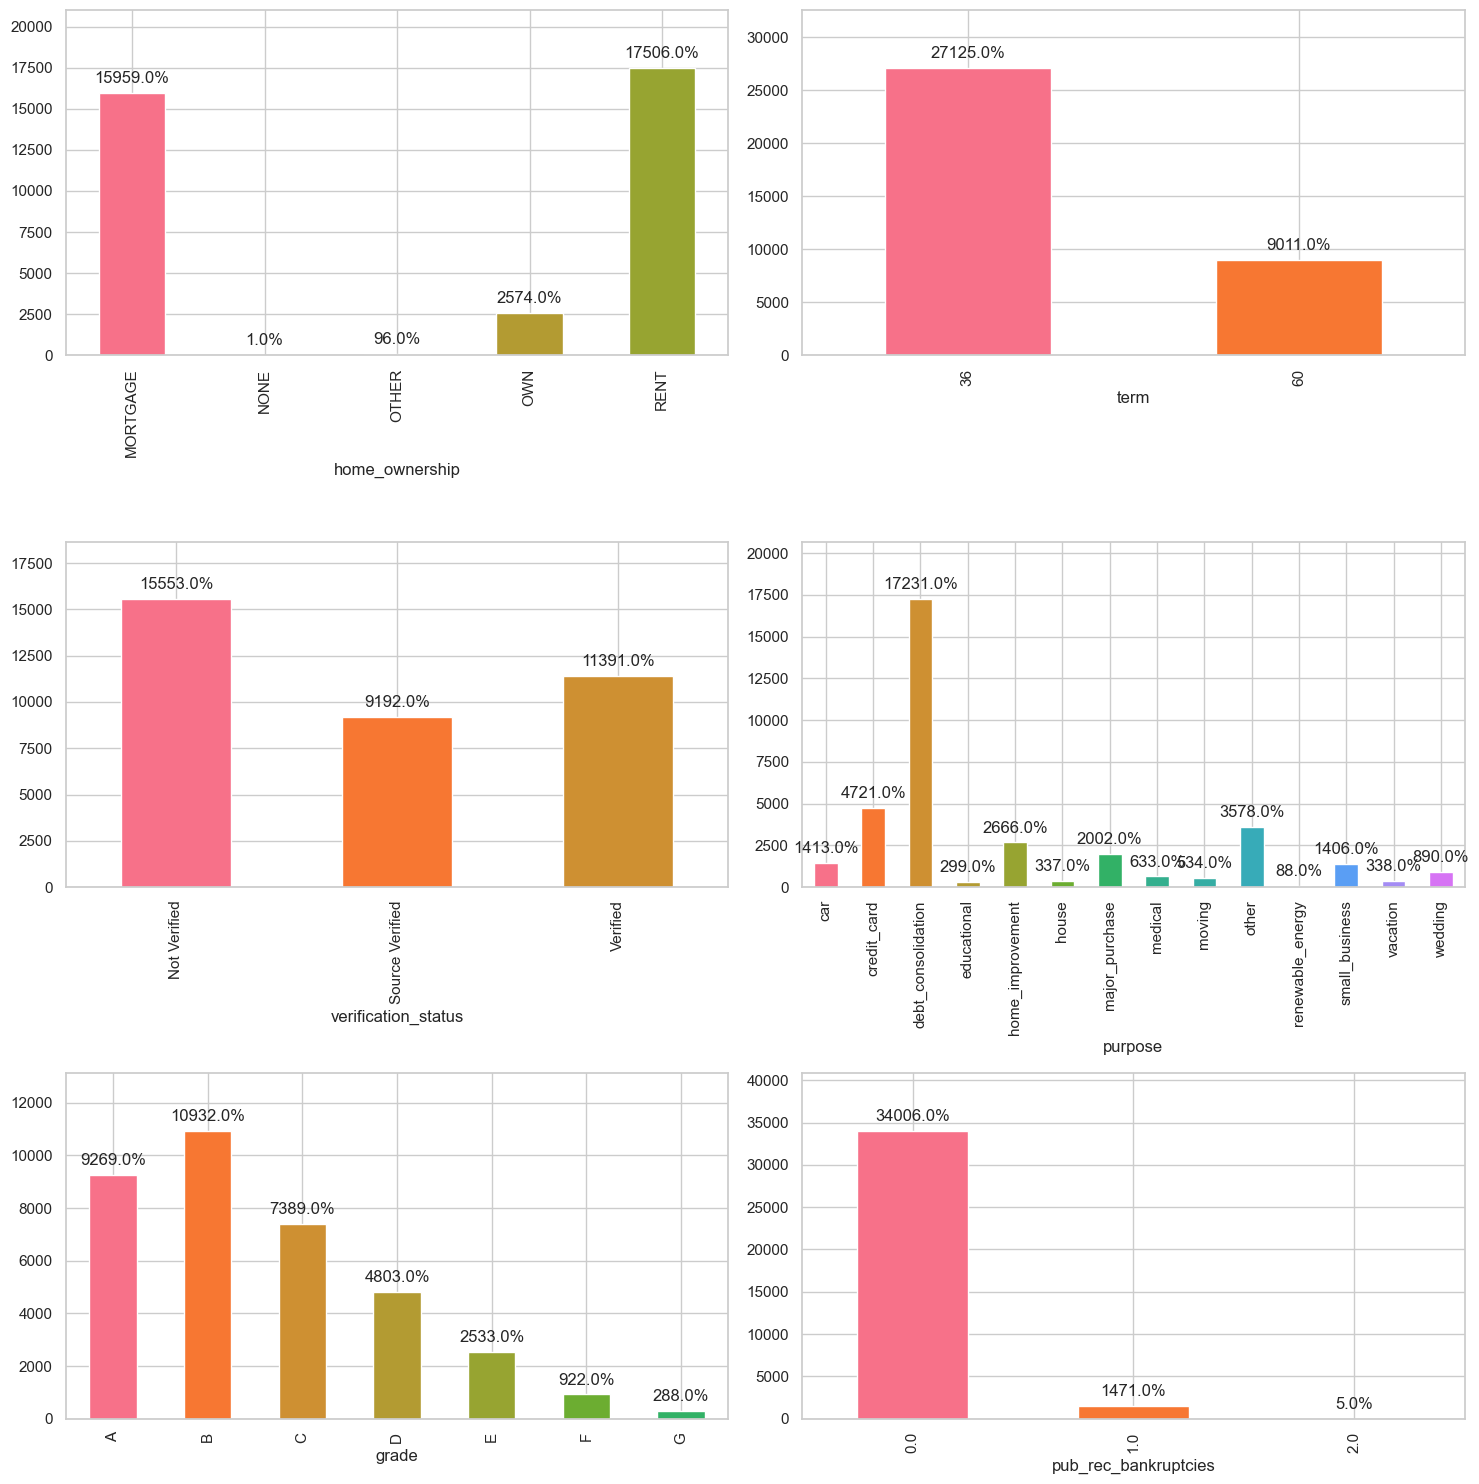

In [97]:
plt.figure(figsize=(15,15))

categoricalBarPlots(master_loan, ['home_ownership', 'term', 'verification_status', 'purpose', 'grade', 'pub_rec_bankruptcies'])

**Obervation**
* Most loans are for 36 month term 
* Very few loans are extended to people with prior record of bankruptcy
* debt_consolidation is by far the largest 'purpose' for seeking a loan 
* Most approved loans are high grade
* <mark> We should investigate the **frequencies of defaults** by term, purpose and prior record of bankruptcy </mark>

---
#### Power Law
Do some of these variables exhibit the power law? Let's see. 

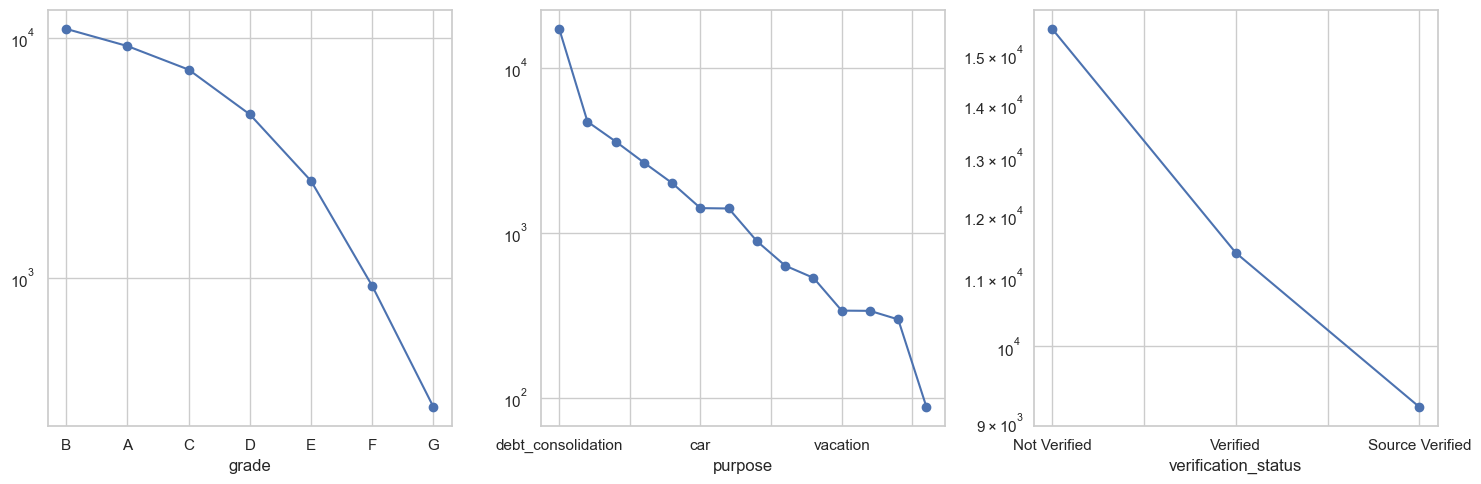

In [98]:
#Let's see if some of these variables follow the famous power law.
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
master_loan.groupby('grade').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
plt.subplot(1, 3, 2)
master_loan.groupby('purpose').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
plt.subplot(1, 3, 3)
master_loan.groupby('verification_status').loan_amnt.count().sort_values(ascending=False).plot(kind='line', logy=True, marker='o', color='b')
plt.tight_layout()

<mark>purpose and verification_status follow the power law</mark>

---
#### Variable: term
Data_Dictionary: The number of payments on the loan. Values are in months and can be either 36 or 60.

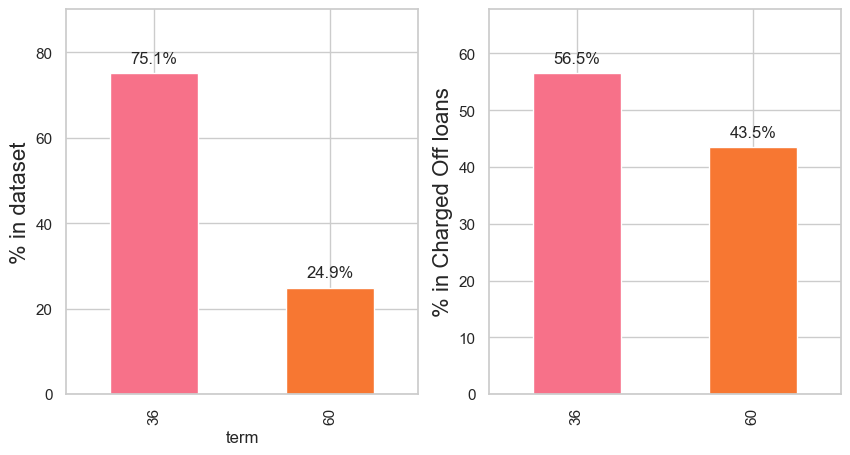

In [102]:
plt.figure(figsize=(10,5))
plot_percentages(master_loan, 'term')

**Observation:**
-  Around 75% of the total loans are given for duration of 3 years. while just 25% of the loans are those given for 5 years.
-  Among Charged Off loans, percentage of term 60 months rises to 45%. <mark>The higher term loans have a higher chance of default.</mark>  

---
#### Variable: purpose
Data_Dictionary: A category provided by the borrower for the loan request.

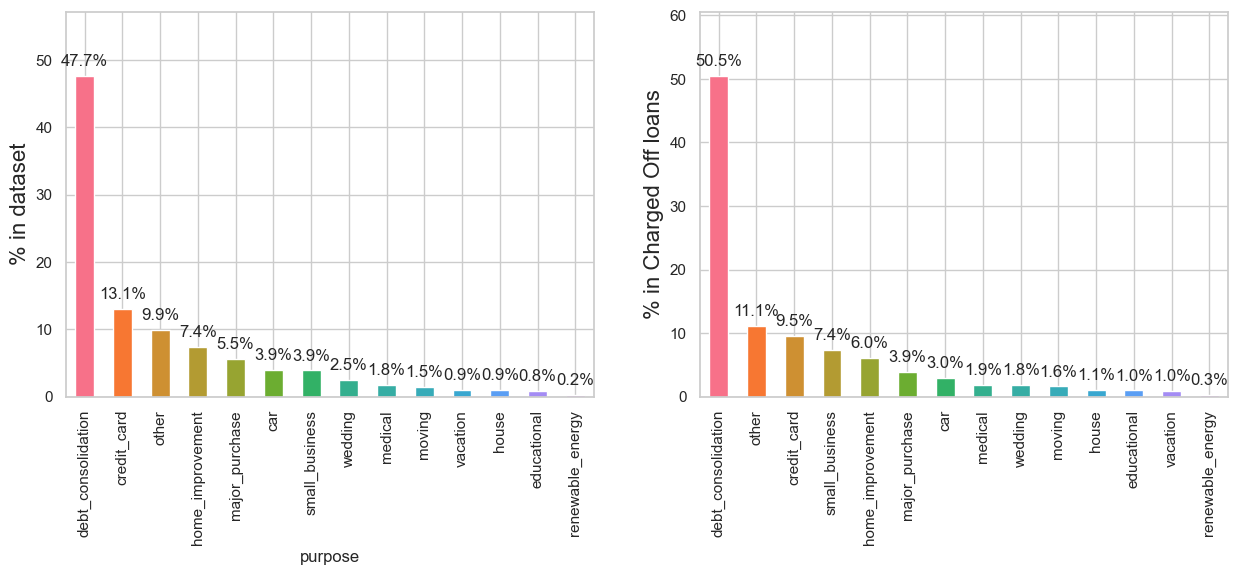

In [103]:
plt.figure(figsize=(15,5))
plot_percentages(master_loan, 'purpose')

**Observation:**
-  <mark>The category 'small_business' percentage **doubles from 3.8 to 7.2** for Charged Off loans.</mark> Let's see how the categories of this variable behave. 

<Axes: xlabel='purpose', ylabel='% of loans Charged Off'>

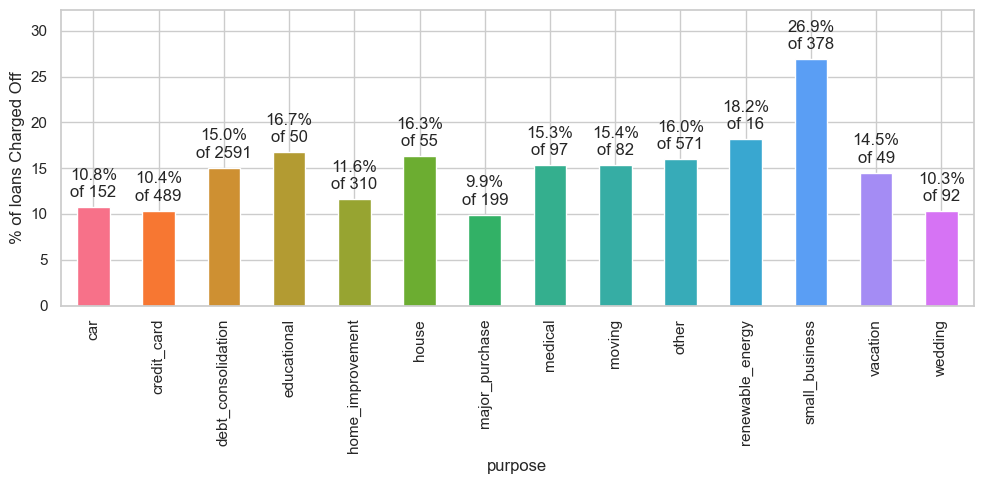

In [104]:
plt.figure(figsize=(10, 5))
plotLoanStatus(master_loan, 'purpose')

**Observation:**
-  <mark>26% of loans for small business are Charged Off. Making them the most risky purpose.</mark> 
- Approximately ~49% of the loans are issued for the purpose of dept consolidation.
- 17% of the loans for renewable_enrgy are charged Off, but the number is too less to be of significance. 

---
#### Variable: pub_rec_bankruptcy
Data_Dictionary: Number of public record bankruptcies

<Axes: xlabel='pub_rec_bankruptcies', ylabel='% of loans Charged Off'>

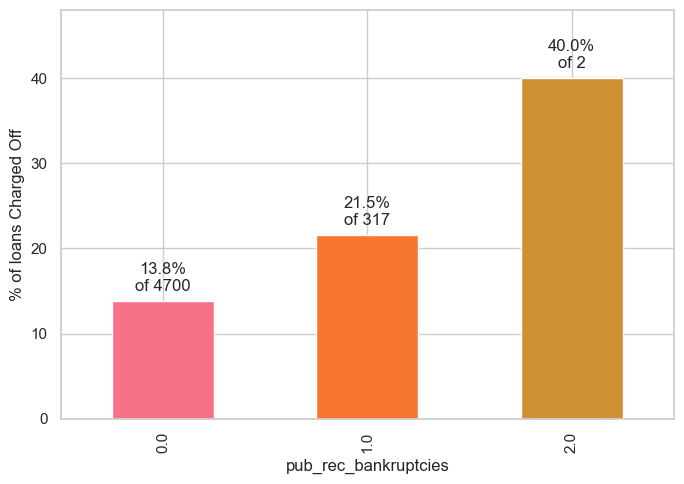

In [105]:
plt.figure(figsize=(7,5))
plotLoanStatus(master_loan, 'pub_rec_bankruptcies')

**Observation:**
-  <mark>The percentage of Charged Off loans is markedly higher when the borrower has a prior record of bankruptcy.</mark> 

---
#### Variable: int_rate
Data_Dictionary: Interest Rate on the loan.

In [106]:
master_loan.int_rate.describe()

count    36136.000000
mean        11.968718
std          3.684652
min          5.420000
25%          9.010000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64

C:\Users\saras\AppData\Local\Temp\ipykernel_17380\3098875138.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataframe[col])


<Figure size 1500x500 with 0 Axes>

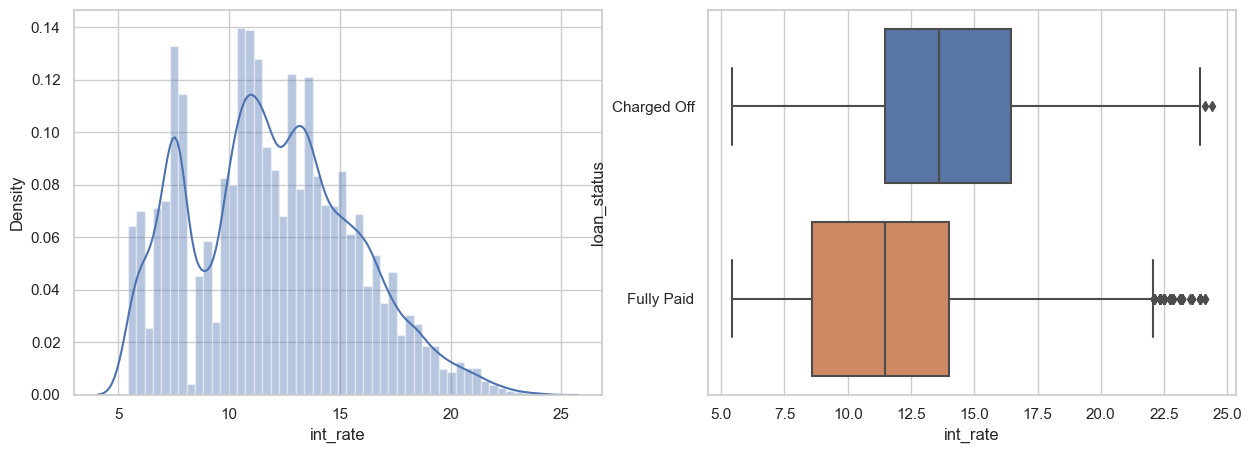

In [107]:
plt.figure(figsize=(15,5))
plot_distribution(master_loan, 'int_rate')

In [108]:
master_loan.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5131.0,13.887778,3.630421,5.42,11.47,13.61,16.45,24.40
Fully Paid,31005.0,11.651134,3.596164,5.42,8.59,11.49,13.99,24.11


**Observation:**
-  Overall, the intrest rate varies from 5.42% to 24.4% with average intrest rate of 11.8%.
-  The intrest rate for Charged Off loans appear to be higher than for Fully paid. This is naturally expected. As, the risk increases the rate of interest imposed on the loan also increases. Let's analyze this more - 

In [109]:
master_loan['interest_rate_buckets'] = round(master_loan['int_rate'])

<Axes: xlabel='interest_rate_buckets', ylabel='% of loans Charged Off'>

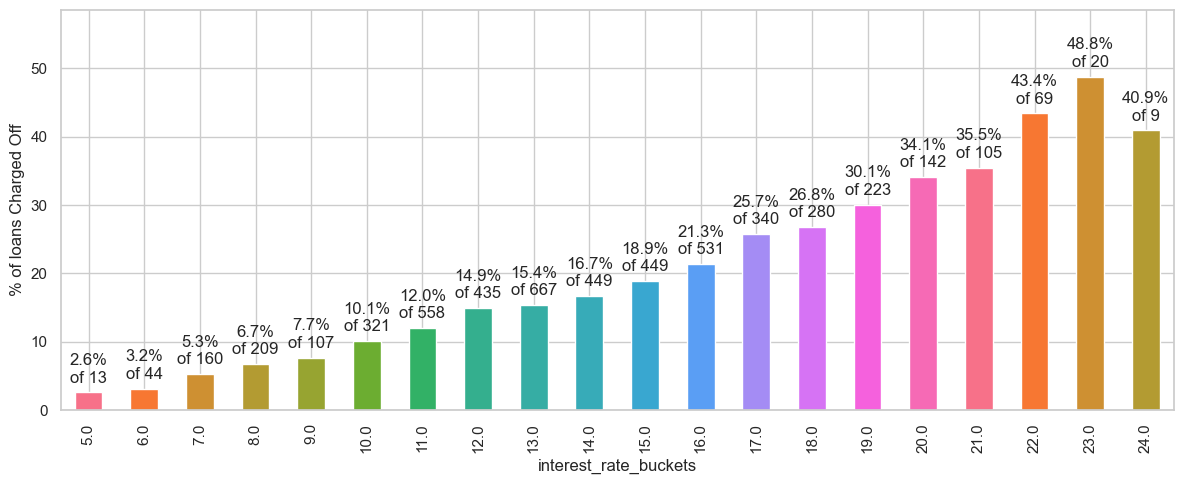

In [110]:
plt.figure(figsize=(12,5))
plotLoanStatus(master_loan, 'interest_rate_buckets')


---
#### Variable: installment
Data_Dictionary: The monthly payment owed by the borrower if the loan originates.

In [111]:
master_loan.installment.describe()

count    36136.000000
mean       323.801459
std        207.242443
min         16.080000
25%        167.630000
50%        280.260000
75%        426.470000
max       1305.190000
Name: installment, dtype: float64

C:\Users\saras\AppData\Local\Temp\ipykernel_17380\3098875138.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataframe[col])


<Figure size 1500x500 with 0 Axes>

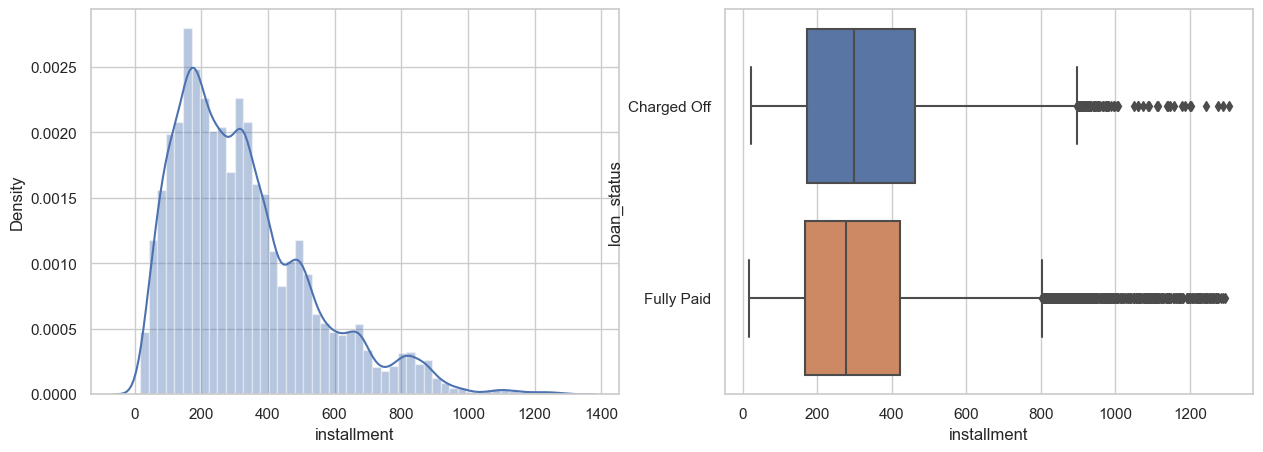

In [112]:
plt.figure(figsize=(15,5))
plot_distribution(master_loan, 'installment')

In [113]:
master_loan.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5131.0,339.194040,215.844671,22.79,171.54,298.33,461.44,1305.19
Fully Paid,31005.0,321.254149,205.676727,16.08,166.94,278.00,421.74,1295.21


**Observation:**
-  installment amount varies largely between 170.08 to 420 with median of 280
-  loans Charged Off have high installment on average 

---
#### Variable: grade and sub_grade
Data_Dictionary: LC assigned loan grade and subgrade.

In [114]:
master_loan.grade.value_counts()

B    10932
A     9269
C     7389
D     4803
E     2533
F      922
G      288
Name: grade, dtype: int64

Let's find the relative frequencies of the unique sub_grade.

In [115]:
master_loan.sub_grade.value_counts(normalize=True).head()

A4    0.074358
B3    0.072670
A5    0.069681
B5    0.068796
B4    0.063482
Name: sub_grade, dtype: float64

In [116]:
plt.figure(figsize=(10,5))
sns.countplot(master_loan['sub_grade'], order=sorted(master_loan.sub_grade.unique()))
plt.show()

ValueError: Input data must be a pandas object to reorder

<Figure size 1000x500 with 0 Axes>

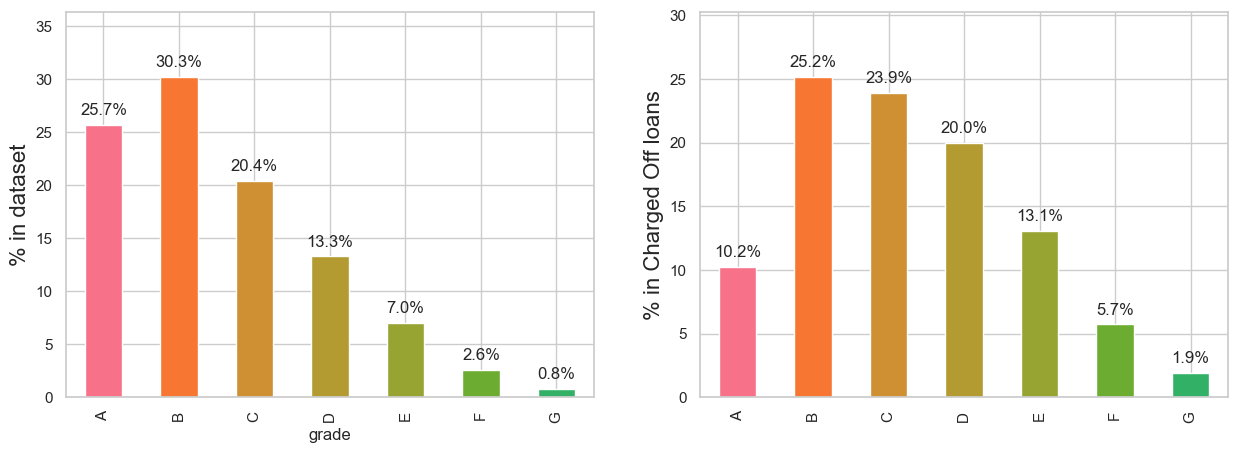

In [118]:
plt.figure(figsize=(15,5))
plot_percentages(master_loan, 'grade', True)

**Observation:**
-  Grade A and B loans are safe. The percentages in full dataset are much higher than percentages in Charged Off loans. 
- Grade D, E, F, G loans are less safe. <mark>We should plot grade by percentage Charged Off by category</mark>
- Lending Clubs grading system is working well. 

<Axes: xlabel='grade', ylabel='% of loans Charged Off'>

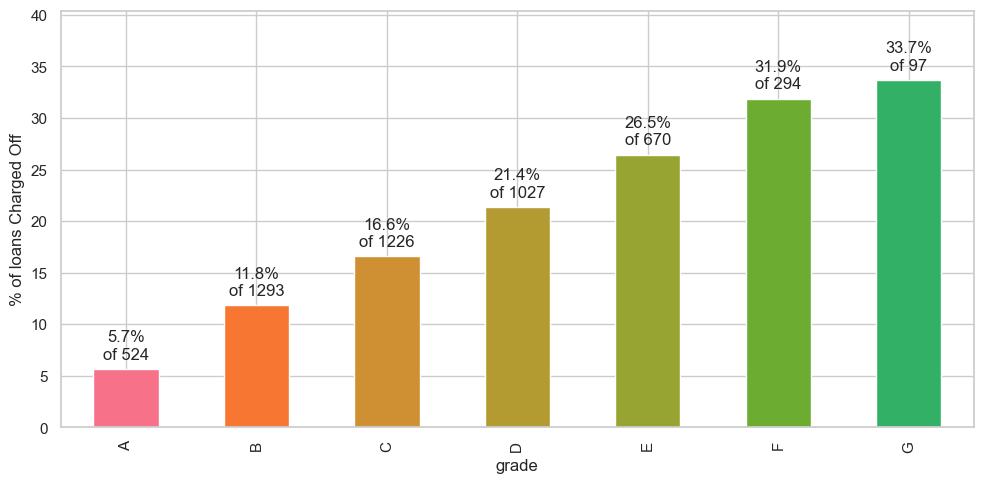

In [119]:
plt.figure(figsize=(10,5))
plotLoanStatus(master_loan, 'grade')

**Observation:**
- Nearly 30% of all loans in Grades F and G see a default. 
- Grade E onwards are risky, and less numerous. <mark>Lending Club should either refuse loans or charge high interest rates.</mark>

<Axes: title={'center': 'int_rate'}, xlabel='grade'>

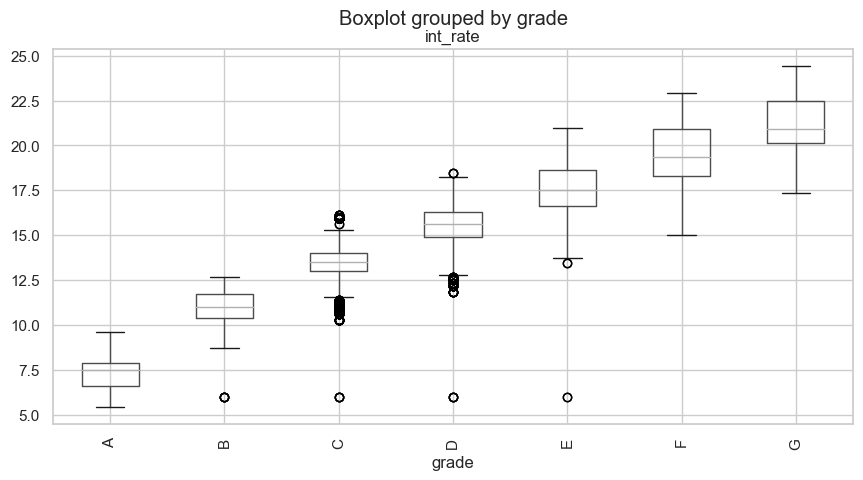

In [120]:
fig, ax = plt.subplots(figsize=(10,5))
master_loan.boxplot(column=['int_rate'],by='grade', ax=ax, rot=90)

**Observation:**
- Here we see that Lending Club is, correctly, charging higher interest rates for lower grade loans. 

---
#### Variable - emp_title
Data_Dictionary: The job title supplied by the Borrower when applying for the loan. Employer Title replaces Employer Name for all loans listed after 9/23/2013

In [121]:
top10_emp_title = master_loan.emp_title.value_counts(normalize=False).head(10)
top10_emp_title

US Army              131
Bank of America      107
IBM                   65
AT&T                  57
Kaiser Permanente     56
UPS                   52
Wells Fargo           52
USAF                  51
US Air Force          51
Walmart               45
Name: emp_title, dtype: int64

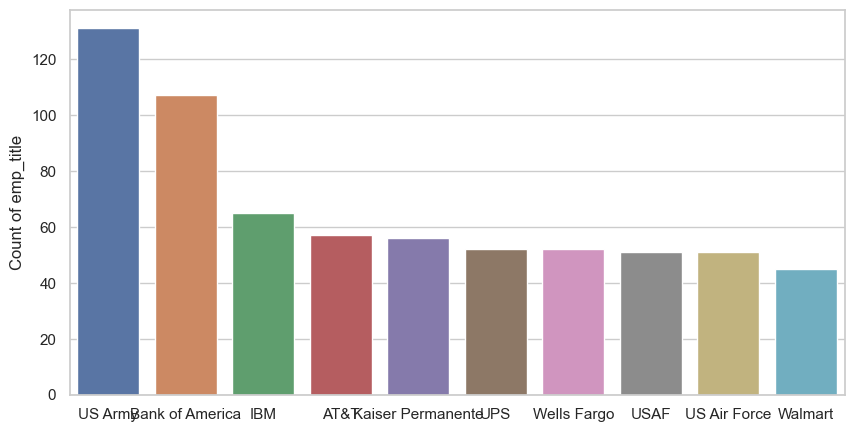

In [122]:
plt.figure(figsize=(10,5))
a=sns.barplot(x=top10_emp_title.index, y=top10_emp_title.values)
a.set_ylabel('Count of emp_title')
plt.show()

**Observation:**
-  Max of the loan takers are from the US Army, then Bank of America follwed by IBM and AT&T.
- Kaiser Permanents, wells Fargo, UPS, USAF, US Air Force and Walmart are also among the top 10 emp_title loans.
- <mark>The numbers per employer are quite low, and this variable is unlikely to have an impact on default rates.

<Axes: xlabel='emp_title', ylabel='% of loans Charged Off'>

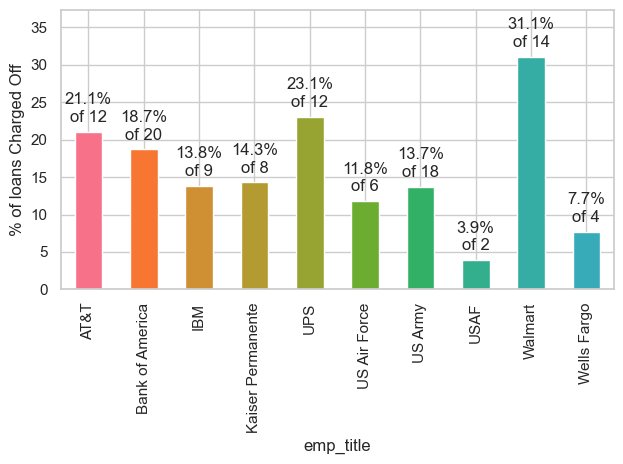

In [124]:
plotLoanStatus(master_loan[master_loan['emp_title'].isin(top10_emp_title.index.values)], 'emp_title')

---
#### Variable - emp_length
Data_Dictionary: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

In [125]:
master_loan.emp_length.value_counts(normalize=True)

10    0.225703
2     0.115619
0     0.114207
3     0.107953
4     0.090381
5     0.085538
1     0.084874
6     0.058086
7     0.046021
8     0.038493
9     0.033125
Name: emp_length, dtype: float64

In [126]:
plt.figure(figsize=(10,5))
sns.countplot(master_loan['emp_length'], order=sorted(master_loan.emp_length.unique()))
plt.show()

ValueError: Input data must be a pandas object to reorder

<Figure size 1000x500 with 0 Axes>

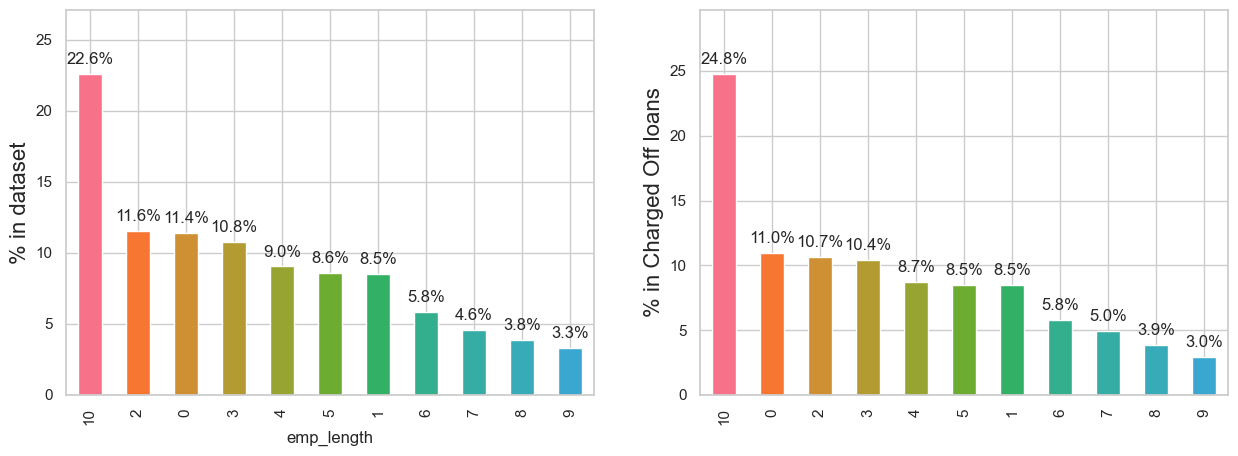

In [127]:
plt.figure(figsize=(15, 5))
plot_percentages(master_loan, 'emp_length')

**Observation:**
- 22.7% of the of loan taker have an employment length of more than 10 years.
- <mark>There is no impact of employment length to chance of loan default.</mark>

---
#### Variable - home_ownership
Data_Dictionary: The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

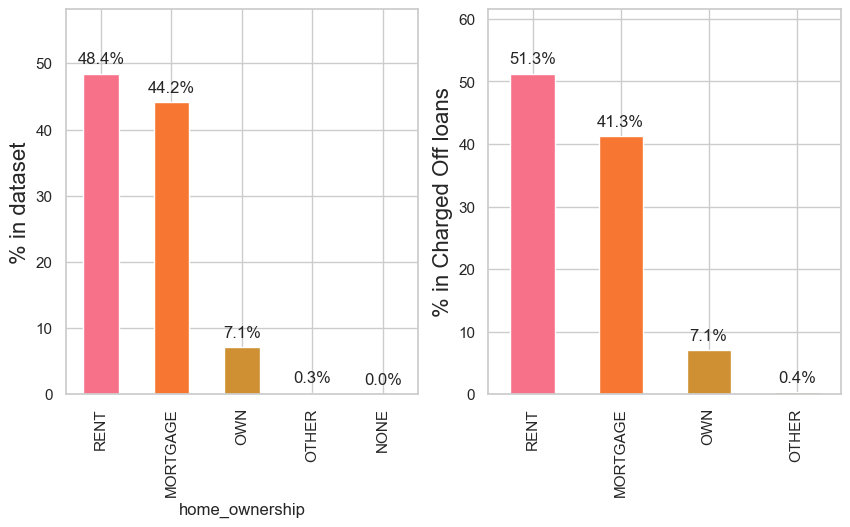

In [128]:
plt.figure(figsize=(10,5))
plot_percentages(master_loan, 'home_ownership')

**Observation:**
- <mark>There is no impact of home_ownership to propensity to default on loan.</mark>


#### Variable - annual_inc
Data_Dictionary: The self-reported annual income provided by the borrower during registration.

In [129]:
master_loan.annual_inc.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

count    3.613600e+04
mean     6.903275e+04
std      6.462191e+04
min      4.000000e+03
10%      3.000000e+04
25%      4.100000e+04
50%      6.000000e+04
75%      8.200000e+04
90%      1.150000e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

<Axes: xlabel='annual_inc'>

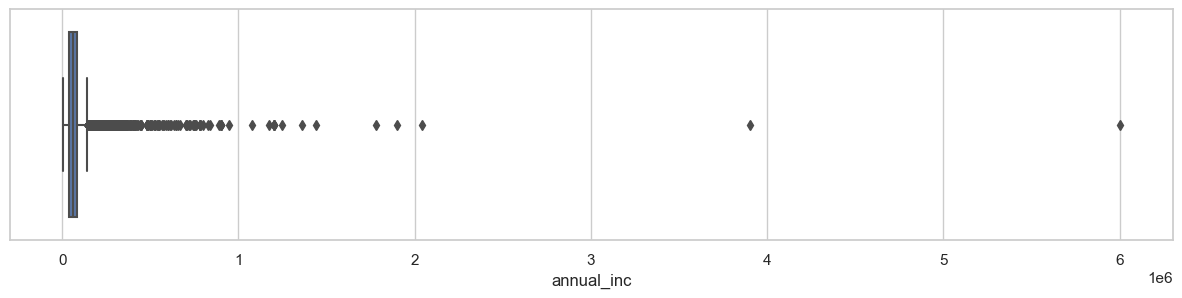

In [130]:
plt.figure(figsize=(15, 3))
sns.boxplot(x=master_loan['annual_inc'], data=master_loan)

The annual income reprted by the borrowers range from min of 4,000 to max of 6,000,000. <mark>There are clearly people with distinctly large income who applying for relatively small loans (up to a maximum of 35,000).</mark>
<br> Median annual income is around 60,000
<br> Most people have an annual income less than 115000

In [131]:
# Let's get rid of outliers to analyze annual income. 
# Keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
df = master_loan[np.abs(master_loan.annual_inc-master_loan.annual_inc.mean()) <= (3*master_loan.annual_inc.std())]

In [132]:
df.annual_inc.describe()

count     35884.000000
mean      66124.563525
std       35801.611753
min        4000.000000
25%       41000.000000
50%       59000.000000
75%       81228.000000
max      262000.000000
Name: annual_inc, dtype: float64

C:\Users\saras\AppData\Local\Temp\ipykernel_17380\3204015255.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['annual_inc'], hist_kws={'log':False})


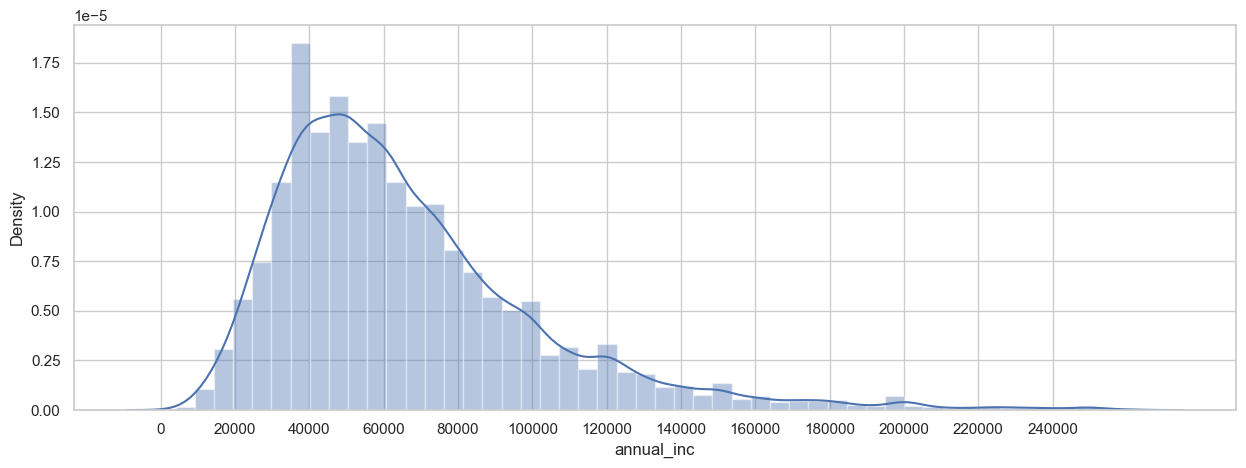

In [133]:
plt.figure(figsize=(15, 5))
sns.distplot(df['annual_inc'], hist_kws={'log':False})
plt.xticks(np.arange(0, 260000, 20000))
plt.show()

**Observation:**
-  10000 seems to be a good bin size to further analyze income as categories 

In [134]:
#Create Derived categorical variable
master_loan['income_bin'] = master_loan['annual_inc']/20000
#master_loan['income_bin'] = pd.cut(master_loan['annual_inc'], [x for x in range(0, 6010000, 10000)], labels=[str(x)+'-'+str(x+10)+'k' for x in range (0, 6000, 10)])
master_loan['income_bin'] = master_loan['income_bin'].astype(int)


[Text(0, 0, '0-10k'),
 Text(1, 0, '10-20k'),
 Text(2, 0, '20-30k'),
 Text(3, 0, '30-40k'),
 Text(4, 0, '40-50k'),
 Text(5, 0, '50-60k'),
 Text(6, 0, '60-70k'),
 Text(7, 0, '70-80k'),
 Text(8, 0, '80-90k'),
 Text(9, 0, '90-100k'),
 Text(10, 0, '100-110k'),
 Text(11, 0, '110-120k'),
 Text(12, 0, '120-130k'),
 Text(13, 0, '130-140k'),
 Text(14, 0, '140-150k'),
 Text(15, 0, '150-160k'),
 Text(16, 0, '160-170k'),
 Text(17, 0, '170-180k'),
 Text(18, 0, '180-190k'),
 Text(19, 0, '190-200k'),
 Text(20, 0, '200-210k')]

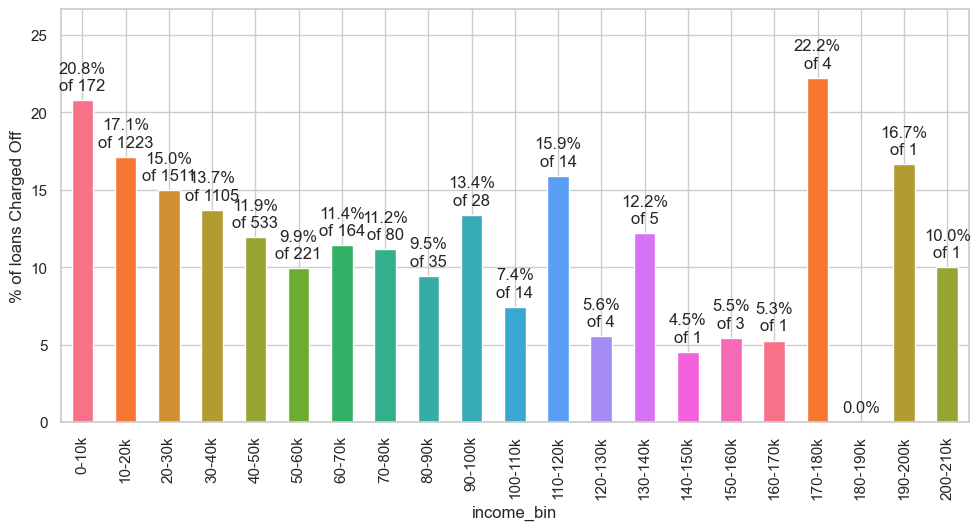

In [135]:
plt.figure(figsize=(10,5))
ax = plotLoanStatus(master_loan.loc[master_loan['income_bin']<21], 'income_bin')
ax.set_xticklabels([(str(int(x.get_text())*10)+'-'+str(int(x.get_text())*10+10)+'k') for x in ax.get_xticklabels()])

**Observation:**
- <mark>Loan defaults are higher for lower income, and progressively reduce as incomes go up.</mark>
- It will be interesting to see a bivariate analysis of defaults by income buckets and loan amounts later. 

---
#### Variable - verification_status
Data_Dictionary: Indicates if income was verified by LC, not verified, or if the income source was verified

In [136]:
master_loan.verification_status.value_counts()

Not Verified       15553
Verified           11391
Source Verified     9192
Name: verification_status, dtype: int64

Loans 'Verified' and 'Source Verified' status both imply that LC has cross checked the income value specified by the borrower and thus both statuses can be treated as one.

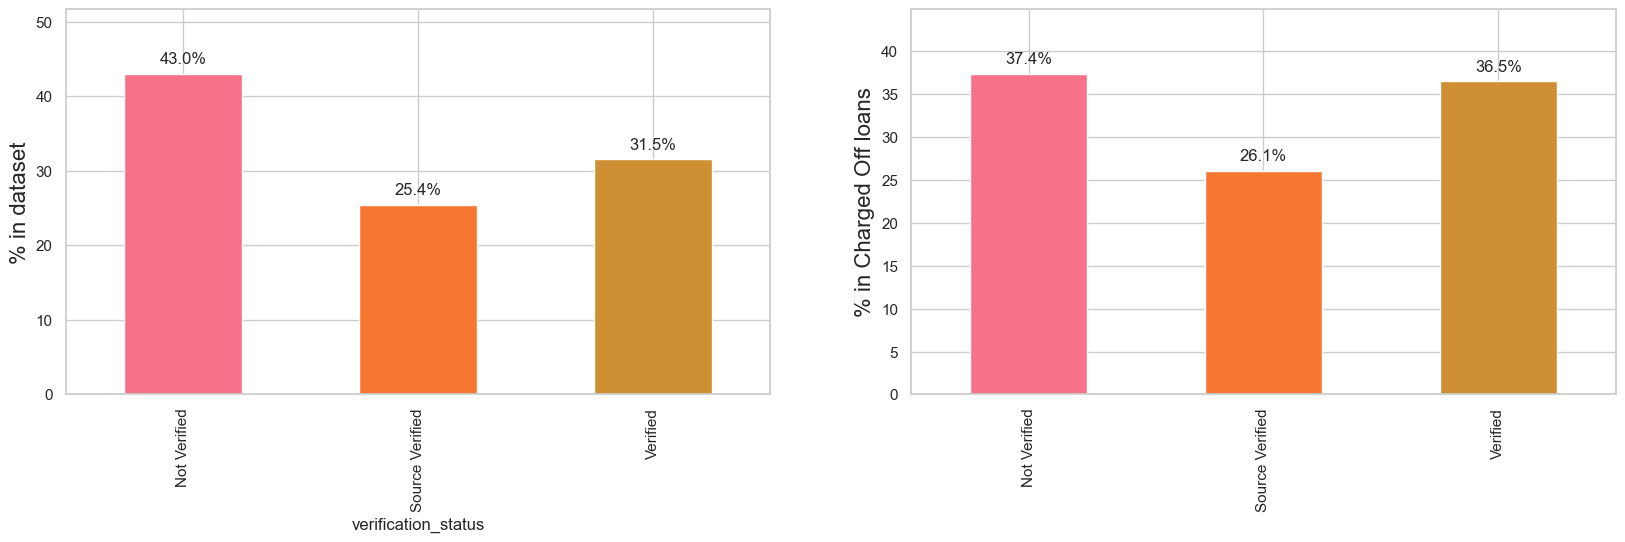

In [137]:
plt.figure(figsize=(20,5))
plot_percentages(master_loan, 'verification_status', True)

**Observation:**
-  Overall, it appears that there are more 'Non Verified' loans than the 'Source Verified' and 'Verified' loans. LC should take steps to verify these loans income so as to reduce the Charge Off percentage.
-  <mark>Verified loans show more charged Off percentage as compared to Not verified loans.</mark> This is unexpected and will be investigated later in bivariate analysis 

#### Variable: issue_d
Data_Dictionary: The month which the loan was funded

ValueError: Input data must be a pandas object to reorder

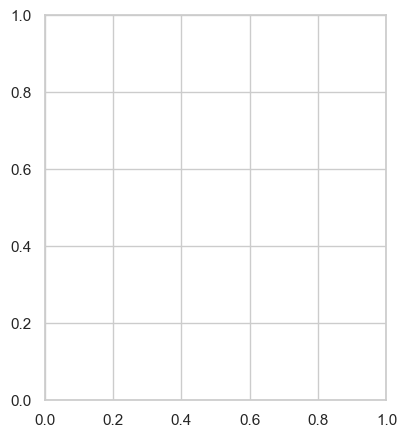

In [138]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.countplot(master_loan['issue_d_year'], order=sorted(master_loan.issue_d_year.unique()))

plt.subplot(1, 3, 2)
sns.countplot(master_loan['issue_d_month'], order=sorted(master_loan.issue_d_month.unique()))

#Fraction of loans charged off and fully Paid
plt.subplot(1, 3, 3)
plotLoanStatus(master_loan, 'issue_d_year')

plt.show()


**Observation:**
-  Over the years, LC as an organisation has been giving more loans. From Aug,2007 to 2011 the loans issued have risen significantly.
-  Within a year, the number of loan issued rises over the month from jan to Dec. Dcember is the month of the year were the maximum number of loans are being issued. Is the company trying to meet targets in the later months of the year? 
-  Year of loan has no significant effect on likelihood of default. 

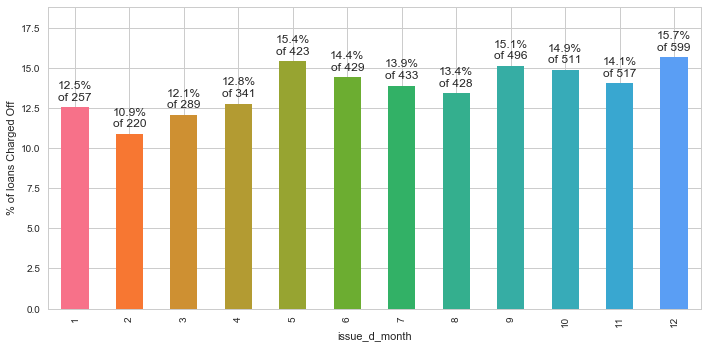

In [194]:
plt.figure(figsize=(10, 5))
plotLoanStatus(master_loan, 'issue_d_month')

**Observation:**
-  Month of loan is spread out and has no significant effect on likelihood of default. 

---
#### Variable - title
Data_Dictionary: The loan title provided by the borrower

In [139]:
master_loan.title.describe()

count                  36127
unique                 18099
top       Debt Consolidation
freq                    2000
Name: title, dtype: object

In [140]:
master_loan.title.value_counts().head(10)

Debt Consolidation           2000
Debt Consolidation Loan      1549
Personal Loan                 614
Consolidation                 475
debt consolidation            446
Credit Card Consolidation     332
Home Improvement              327
Debt consolidation            308
Personal                      283
Credit Card Loan              281
Name: title, dtype: int64

**Observation:**
- title column has 17662 unique values describing the loan by the borrower. This information is already captured with purpose column under 14 catergories of purpose. We can choose to drop this column.

In [141]:
master_loan = master_loan.drop('title',axis =1 )

---
#### Variable - addr_state
Data_Dictionary: The state provided by the borrower in the loan application

In [142]:
master_loan.addr_state.value_counts(normalize=True).head(10)

CA    0.179821
NY    0.096192
FL    0.071674
TX    0.069432
NJ    0.047238
IL    0.038576
PA    0.038355
VA    0.035809
GA    0.035394
MA    0.033623
Name: addr_state, dtype: float64

ValueError: Input data must be a pandas object to reorder

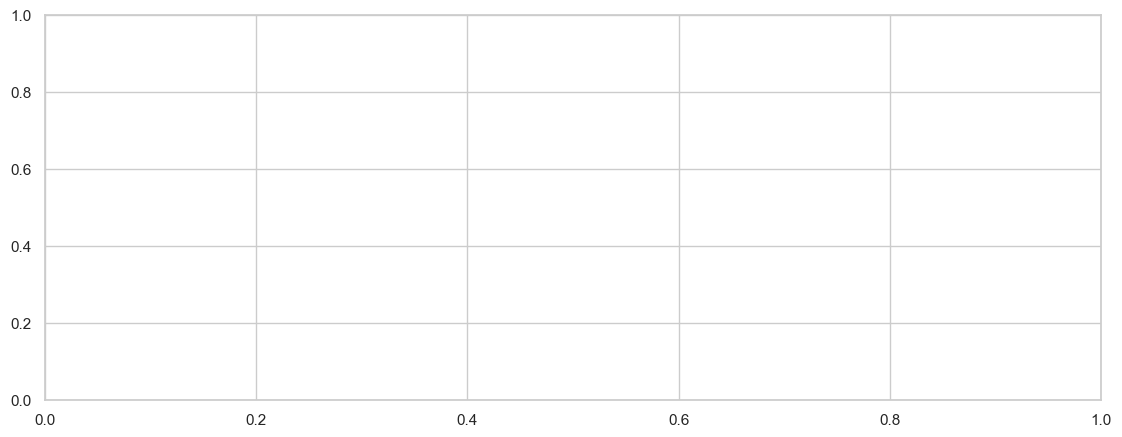

In [143]:
plt.figure(figsize=(30,5))
plt.subplot(1, 2, 1)
sns.countplot(master_loan['addr_state'], order=sorted(master_loan.addr_state.unique()))

#Fraction of loans charged off and fully Paid
charge_off_count = master_loan.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']  
Fully_paid_count = master_loan.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Fully Paid']  

plt.figure(figsize=(30,10))
plt.subplot(2, 2, 1)
a=sns.barplot(x=charge_off_count.index, y=charge_off_count.values)
a.set_ylabel('portion of Loans Charged-off')
#plt.subplot(1, 2, 2)
#b=sns.barplot(x=Fully_paid_count.index, y=Fully_paid_count.values)
#b.set_ylabel('portion of Loans Fully Paid')
plt.show()


**Observation:**
- Maximum loans ~18% are from California following that is 9.5% from New york state and Florida with 7%. This is to be expected as these are also the three most populous US states
- States with higher Charge Off rates have very low number of loans. The percentage is therefore NOT significant and should be ignored. Overall, this variable does not affect propensity to default. 


---
#### Variable - dti
Data_Dictionary: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [144]:
master_loan.dti.describe()

count    36136.000000
mean        13.353784
std          6.646847
min          0.000000
25%          8.250000
50%         13.460000
75%         18.610000
max         29.990000
Name: dti, dtype: float64

The dti index varies from min 0 to max of 30. The median dti is of 13.5

C:\Users\saras\AppData\Local\Temp\ipykernel_17380\3098875138.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataframe[col])


<Figure size 1000x500 with 0 Axes>

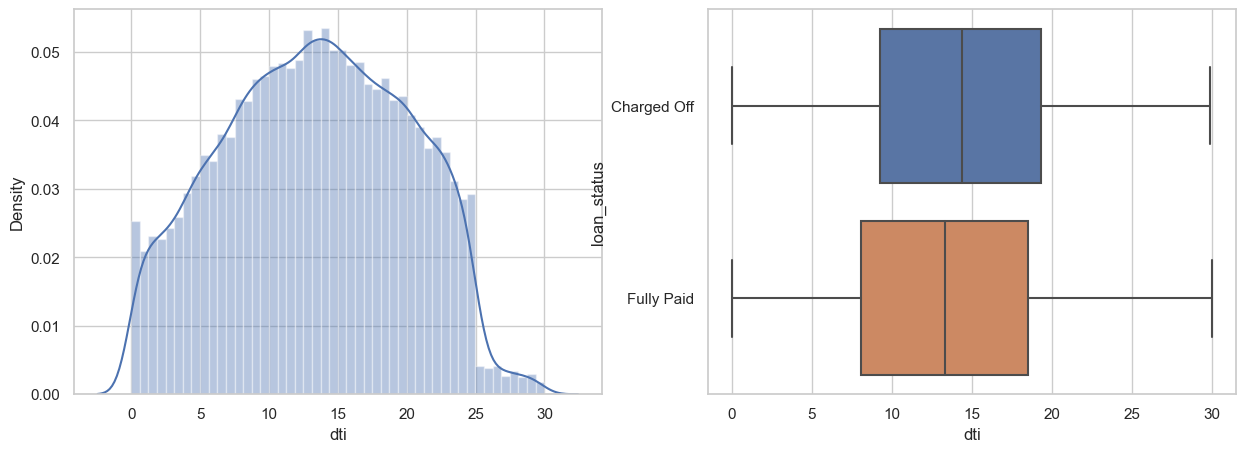

In [145]:
plt.figure(figsize=(10,5))

plot_distribution(master_loan, 'dti')

In [146]:
# Create derived variable 
master_loan['dti_bin'] = pd.cut(master_loan['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])


<Axes: xlabel='dti_bin', ylabel='% of loans Charged Off'>

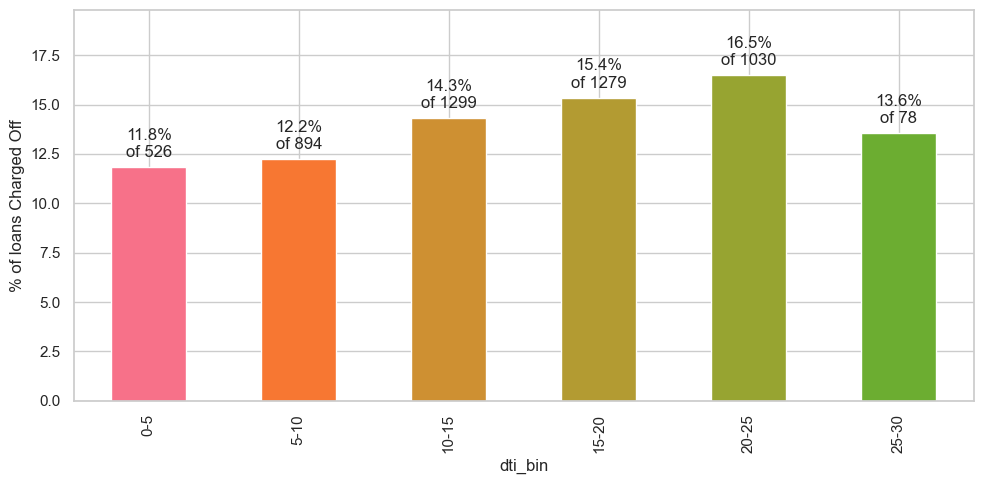

In [147]:
plt.figure(figsize=(10,5))
plotLoanStatus(master_loan, 'dti_bin')

**Observation:**
- When the dti or dept payment to income ratio is higher than 20, higher percentage of loans are Charged Off
- Higher the dti higher the chances of loan being Charged Off

---
#### Variable - delinq_2yrs
Data_Dictionary: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.

In [148]:
master_loan.delinq_2yrs.value_counts(normalize=True)

0     0.890967
1     0.083352
2     0.017545
3     0.005479
4     0.001577
5     0.000581
6     0.000277
7     0.000111
8     0.000055
9     0.000028
11    0.000028
Name: delinq_2yrs, dtype: float64

<Axes: xlabel='delinq_2yrs', ylabel='% of loans Charged Off'>

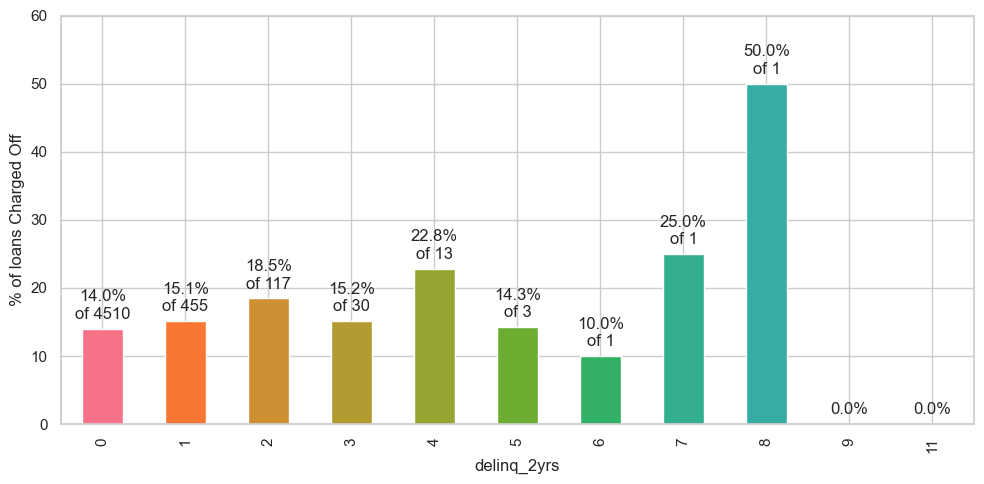

In [149]:
plt.figure(figsize=(10,5))
plotLoanStatus(master_loan, 'delinq_2yrs')

**Observation:**
-  The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years values ranges between 0 and 11.
- There are higher chances of default if this variable is greater than 1. 


---
#### Variable - earliest_cr_line
Data_Dictionary: The month the borrower's earliest reported credit line was opened.

In [150]:
master_loan.earliest_cr_line_year.value_counts(normalize=True).head()

2000    0.083296
1999    0.075742
1998    0.072476
2001    0.065143
1997    0.062237
Name: earliest_cr_line_year, dtype: float64

C:\Users\saras\AppData\Local\Temp\ipykernel_17380\3593445066.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(master_loan['earliest_cr_line_year'])


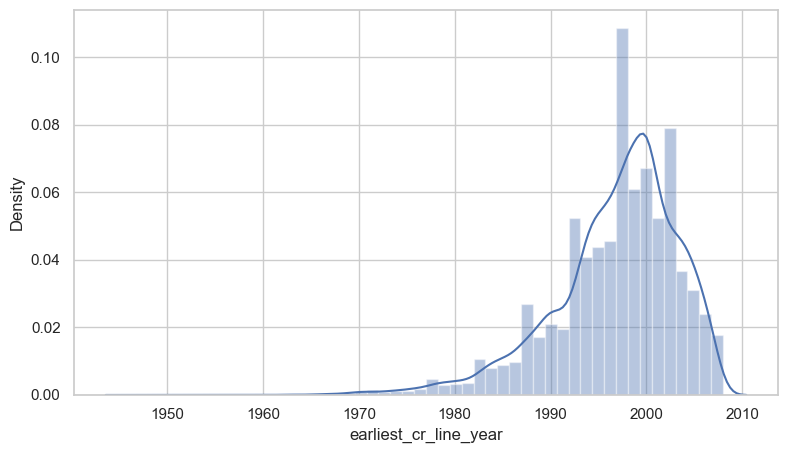

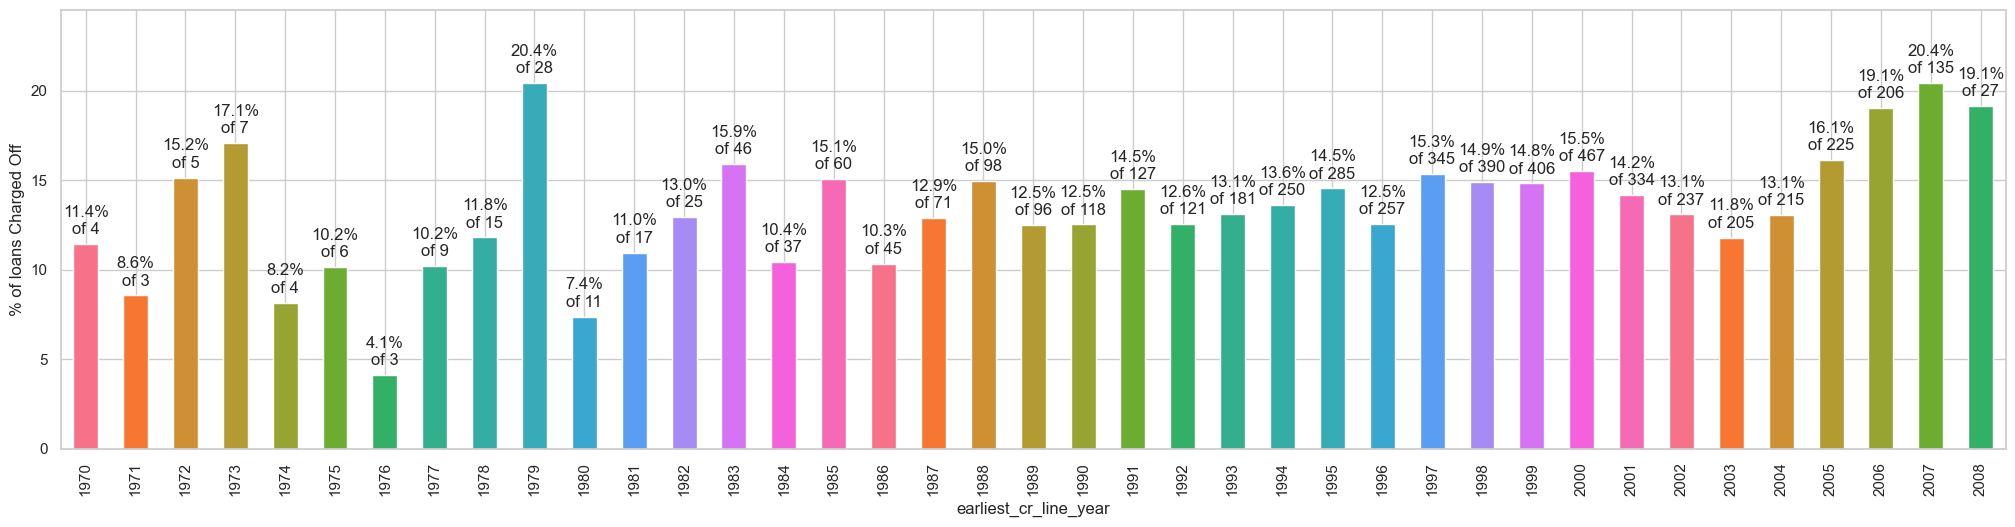

In [151]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
#sns.countplot(master_loan['earliest_cr_line_year'], order=sorted(master_loan.issue_d_year.unique()))
sns.distplot(master_loan['earliest_cr_line_year'])
#plt.subplot(1, 2, 2)
#sns.countplot(master_loan['earliest_cr_line_month'], order=sorted(master_loan.issue_d_month.unique()))
#plt.show()

plt.figure(figsize=(40,10))
plt.subplot(2, 2, 1)
plotLoanStatus(master_loan.loc[master_loan['earliest_cr_line_year'] > 1969], 'earliest_cr_line_year')
plt.show()


**Observation:**
-  8% of the loan applicants have 2000 as the year of earliest credit line.
- Newer borrowers are defauling more often. This is possibly related to the 2008 subprime crisis. 
- There was another economic crisis in US beginning in 1978 with double digit inflation. Newer borrowers of that time too defaulted more often. In general, those who take their first loans at times of recession, presumably young people, default more often. But this variable can be ignored in our analysis. 

---
#### Variable - inq_last_6mths
Data_Dictionary: The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

In [152]:
master_loan.inq_last_6mths.value_counts(normalize=True)

0    0.484614
1    0.276594
2    0.147249
3    0.077153
4    0.008025
5    0.003570
6    0.001577
7    0.000858
8    0.000360
Name: inq_last_6mths, dtype: float64

ValueError: Input data must be a pandas object to reorder

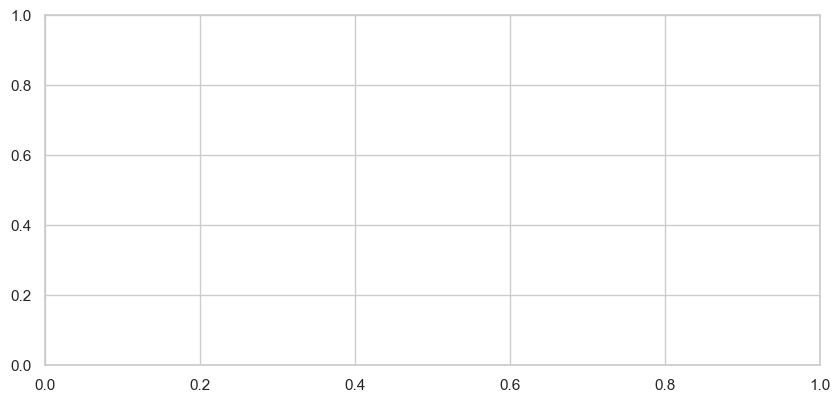

In [153]:
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
c=sns.countplot(master_loan['inq_last_6mths'], order=sorted(master_loan.delinq_2yrs.unique()))
c.set_yscale('log')

plt.subplot(2, 1, 2)
plotLoanStatus(master_loan, 'inq_last_6mths')
plt.show()

**Observation:**
-  48.5% of the borrowers do not make any inquiry
-  Those with more than 2 inquiries default at higher rates. 
- This is probably correlated to having more loans and can be ignored. The revolving line utilization will cover this.

---
#### Variable - open_acc
Data_Dictionary: The number of open credit lines in the borrower's credit file.

In [154]:
master_loan.open_acc.describe()

count    36136.000000
mean         9.324164
std          4.394919
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

The median of the distribution sugests that by large the borrower's seem to have 9 open credit lines.

C:\Users\saras\AppData\Local\Temp\ipykernel_17380\3098875138.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataframe[col])


<Figure size 1500x500 with 0 Axes>

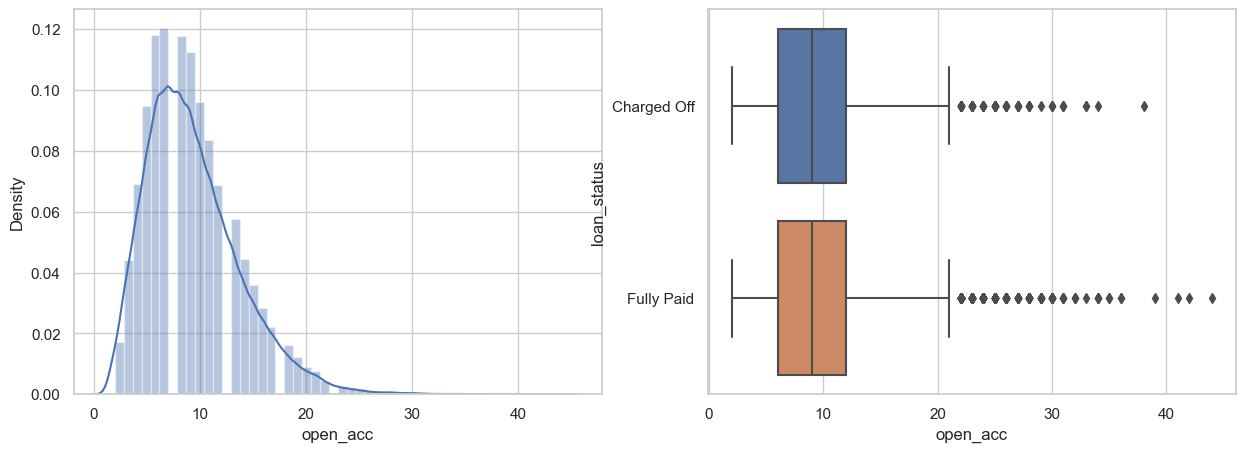

In [155]:
plt.figure(figsize=(15,5))
plot_distribution(master_loan, 'open_acc')
plt.show()

In [156]:
master_loan.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5131.0,9.274216,4.516532,2.0,6.0,9.0,12.0,38.0
Fully Paid,31005.0,9.332430,4.374487,2.0,6.0,9.0,12.0,44.0


**Observation:**
-  The median of the distribution sugests that by large the borrower's seem to have 9 open credit lines.
- There is no significant difference in the credit lines of charged off and fully paid loans.

---
#### Variable - pub_rec
Data_Dictionary: Number of derogatory public records.

In [157]:
master_loan.pub_rec.value_counts(normalize=True)

0    0.947974
1    0.050531
2    0.001245
3    0.000194
4    0.000055
Name: pub_rec, dtype: float64

ValueError: Input data must be a pandas object to reorder

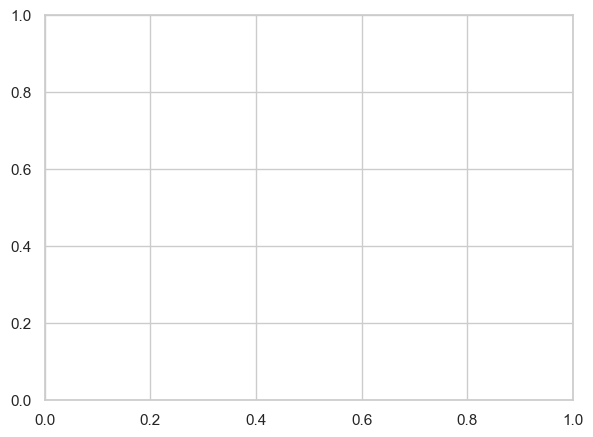

In [158]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
c=sns.countplot(master_loan['pub_rec'], order=sorted(master_loan.delinq_2yrs.unique()))
c.set_yscale('log')

plt.subplot(1, 2, 2)
plotLoanStatus(master_loan, 'pub_rec')
plt.show()



**Observation:**
- 94% have no Public derogatory records. 5% have 1 derogatory record.
- Having even 1 derogatory record increases the chances of Charge Off significantly.

---
#### Variable - revol_bal
Data_Dictionary: Total credit revolving balance

In [159]:
master_loan.revol_bal.describe()

count     36136.000000
mean      13349.526815
std       15722.083866
min           0.000000
25%        3738.000000
50%        8897.000000
75%       17035.000000
max      149588.000000
Name: revol_bal, dtype: float64

The revolving bal varies from min 0 to max of 150,000. The median revol_bal is of ~9000.

In [160]:
# keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
master_loan = master_loan[np.abs(master_loan.revol_bal-master_loan.revol_bal.mean()) <= (3*master_loan.revol_bal.std())]

The values vary a lot. Transforming to a log scale will help analyse better.

In [161]:
master_loan['revol_bal_log'] = master_loan['revol_bal'].apply(lambda x : np.log(x+1))

C:\Users\saras\AppData\Local\Temp\ipykernel_17380\1189616932.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(master_loan['revol_bal'])


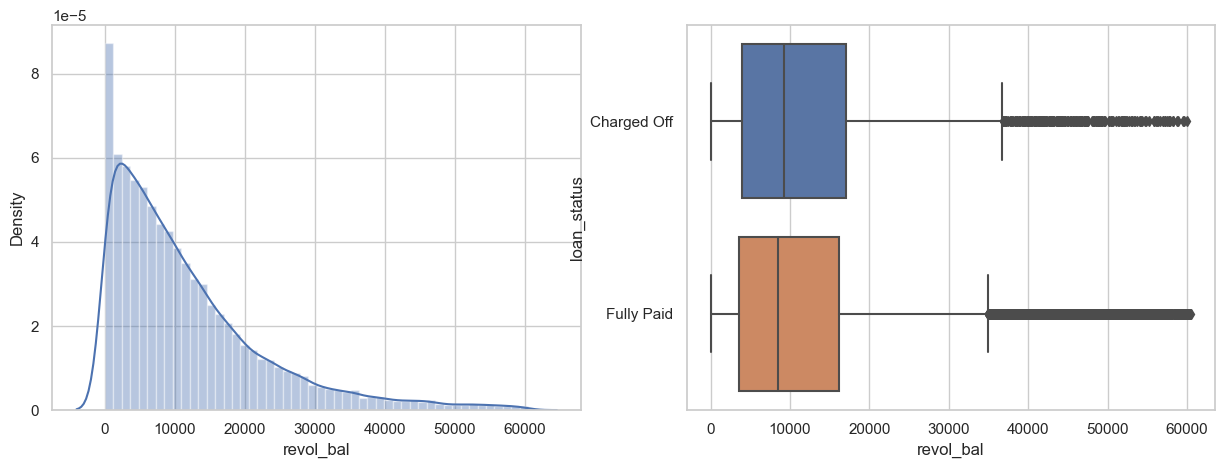

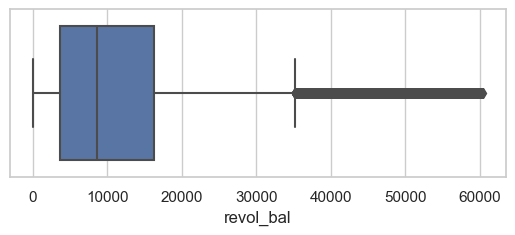

In [162]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.distplot(master_loan['revol_bal'])
plt.subplot(1, 2, 2)
sns.boxplot(x=master_loan['revol_bal'], y=master_loan['loan_status'], data=master_loan)
#sns.barplot(x='loan_status', y='annual_inc_log',data= master_loan)
plt.show()
plt.subplot(2, 1, 1)
sns.boxplot(x=master_loan['revol_bal'], data=master_loan)
plt.show()

In [163]:
master_loan.groupby('loan_status')['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5043.0,12349.505651,11348.160656,0.0,3988.0,9223.0,17107.0,60071.0
Fully Paid,30303.0,11624.097284,10984.503058,0.0,3584.0,8556.0,16135.0,60506.0


**Observation:**
-  There is no large difference in revolving balance mean for charged off an fully Paid loans

---
#### Variable - revol_util
Data_Dictionary:Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [164]:
master_loan.revol_util.describe()

count    35300.000000
mean        48.798251
std         28.237432
min          0.000000
25%         25.500000
50%         49.200000
75%         72.200000
max         99.900000
Name: revol_util, dtype: float64

<Axes: title={'center': 'revol_util'}, xlabel='loan_status'>

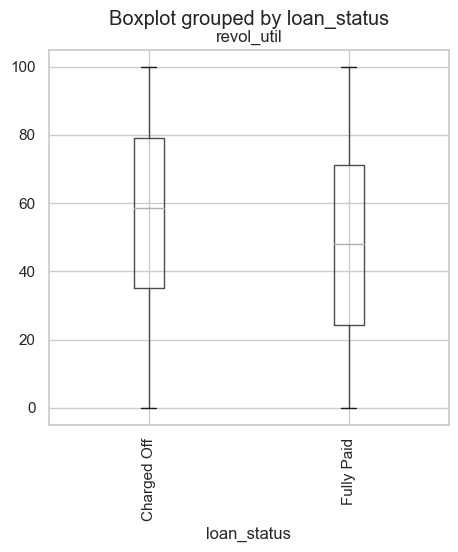

In [165]:
fig, ax = plt.subplots(figsize=(5,5))
df.boxplot(column=['revol_util'],by='loan_status', ax=ax, rot=90)

**Observation:**
-  The average utilization rate is around 49%
-  <mark>Average revolving Utilisation rate is seen to be higher for Charged Off loans than the Fully Paid loans</mark>. This requires more analysis. 

In [166]:
master_loan['revol_util_bin'] = round(master_loan['revol_util']/5)

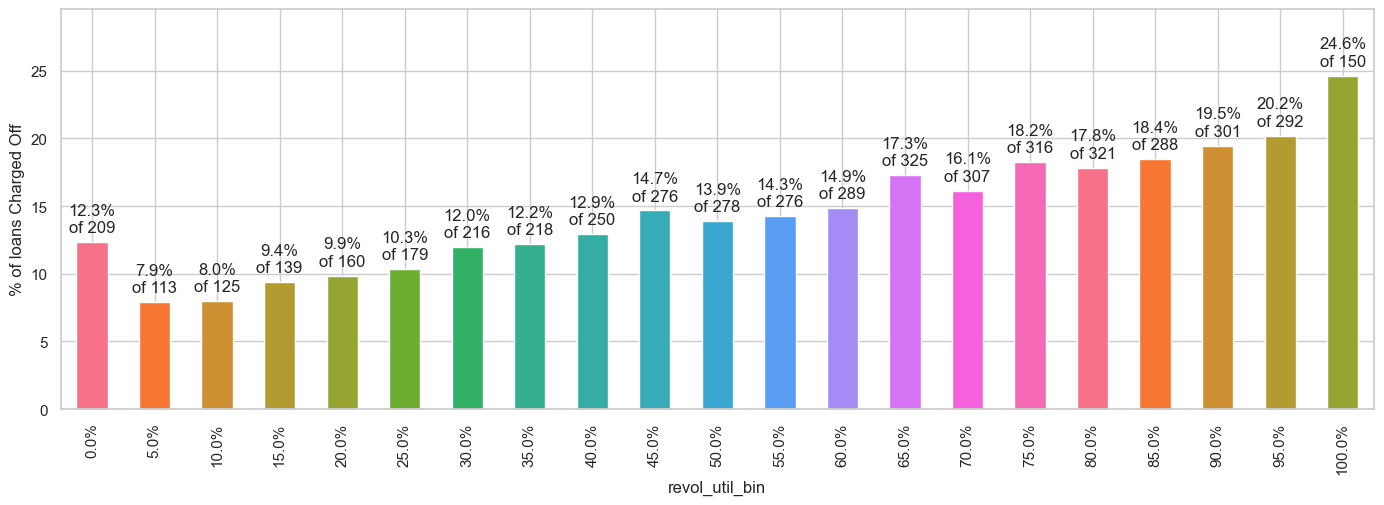

In [167]:
plt.figure(figsize=(14,5))
ax = plotLoanStatus(master_loan, 'revol_util_bin')
ax.set_xticklabels([(str(float(x.get_text())*5)+'%') for x in ax.get_xticklabels()])
plt.show()

---
#### Variable - total_acc
Data_Dictionary: The total number of credit lines currently in the borrower's credit file.

In [168]:
master_loan.total_acc.describe()

count    35346.000000
mean        21.925027
std         11.333012
min          2.000000
25%         13.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

C:\Users\saras\AppData\Local\Temp\ipykernel_17380\3098875138.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataframe[col])


<Figure size 1500x500 with 0 Axes>

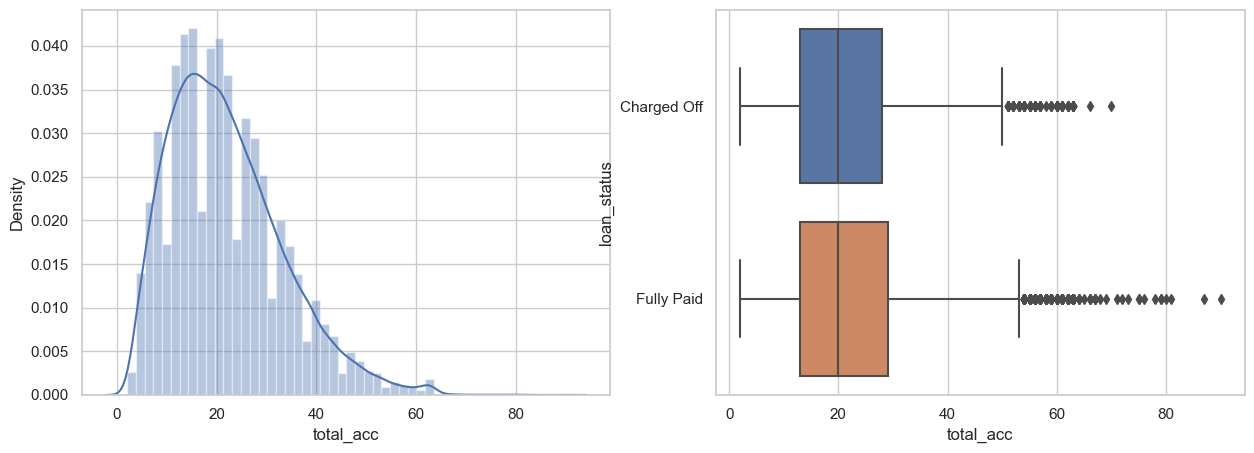

In [169]:
plt.figure(figsize=(15,5))

plot_distribution(master_loan, 'total_acc')

**Observation:**
-  The are approx. 22 average credit lines for the borrower's.
-  There is no big difference between the Charged Off and Fully Paid credit lines

---
#### Variable - out_prncp
Data_Dictionary: Remaining outstanding principal for total amount funded.

In [170]:
master_loan.out_prncp.value_counts()

0.0    35346
Name: out_prncp, dtype: int64

In [171]:
master_loan.groupby('loan_status')['out_prncp'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5043.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fully Paid,30303.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Observation:**
-  As we are studying how the Fully paid loan are different from the Charged off loans, loan_status = current, has been ingnored for analysis. Therefore out_prncp variable can be removed or droped.

In [172]:
master_loan = master_loan.drop('out_prncp',axis=1)

---
#### Variable - out_prncp_inv
Data_Dictionary: Remaining outstanding principal for portion of total amount funded by investors

In [173]:
master_loan.out_prncp_inv.value_counts()

0.0    35346
Name: out_prncp_inv, dtype: int64

In [174]:
master_loan.groupby('loan_status')['out_prncp_inv'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5043.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fully Paid,30303.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Observation:**
-  As we are studying how the Fully paid loan are different from the Charged off loans, loan_status = current, has been ignored for analysis. Therefore out_prncp_inv variable can be removed or dropped.

In [175]:
master_loan = master_loan.drop('out_prncp_inv',axis=1)

#### Variable - total_pymnt
Data_Dictionary: Payments received to date for total amount funded.

In [176]:
master_loan.total_pymnt.describe()

count    35346.000000
mean     11837.087347
std       8692.921746
min          0.000000
25%       5556.130000
50%       9725.475000
75%      16024.210000
max      58563.680000
Name: total_pymnt, dtype: float64

In [177]:
# keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
master_loan = master_loan[np.abs(master_loan.total_pymnt-master_loan.total_pymnt.mean()) <= (3*master_loan.total_pymnt.std())]

In [178]:
master_loan['total_pymnt'] = master_loan['total_pymnt'].apply(lambda x : np.log(x))

C:\Users\saras\AppData\Local\Temp\ipykernel_17380\3098875138.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataframe[col])


OverflowError: cannot convert float infinity to integer

<Figure size 1500x500 with 0 Axes>

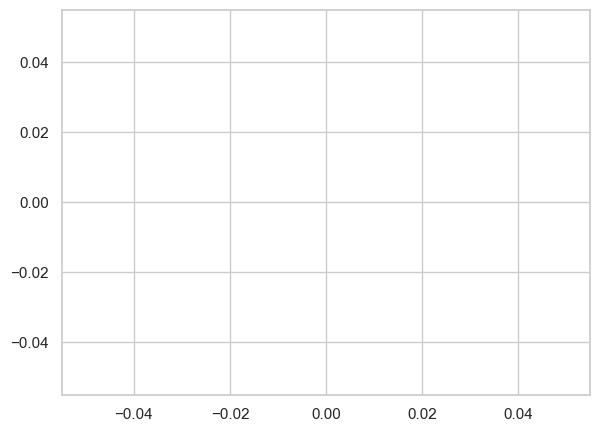

In [179]:
plt.figure(figsize=(15,5))
plot_distribution(master_loan, 'total_pymnt')
plt.show()

**Observation:**
-  The average payment received to date for the Charged Off loan is comparatively less than Fully Paid loans.
-  This variable may not be avaialble at the time of loan funding. We can drop this varaible from analysis.

In [180]:
master_loan = master_loan.drop('total_pymnt',axis=1)

---
#### Variable - total_pymnt_inv
Data_Dictionary: Payments received to date for portion of total amount funded by investors.

**Observation:**
-  This variable may not be avaialble at the time of loan funding. We can drop this variable from analysis.

In [181]:
master_loan = master_loan.drop('total_pymnt_inv',axis=1)

---
#### Variable - total_rec_prncp
Data_Dictionary: Principal received to date

**Observation:**
-  This variable may not be available at the time of loan funding. we can remove this variable from analysis.

In [182]:
master_loan = master_loan.drop('total_rec_prncp',axis=1)

---
#### Variable - total_rec_int
Data_Dictionary: Interest received to date.

**Observation:**
-  This variable may not be avaialble at the time of loan funding. We may drop this variable from analysis.

In [183]:
master_loan = master_loan.drop('total_rec_int',axis=1)

---
#### Variable - total_rec_late_fee
Data_Dictionary: Late fees received to date.

**Observation:**
-  The distribution of late fee is very insignificant to this analysis. we can drop this variable.
-  This variable may not be avaialble at the time of loan funding.

In [184]:
master_loan = master_loan.drop('total_rec_late_fee',axis=1)

---
#### Variable - recoveries
Data_Dictionary: post charge off gross recovery.

**Observation:**
-  Recoveries is only for the Charged Off loans.
- This Variable does not help as it comes to action after the loan has been Charged Off. Lets drop this variable.

In [185]:
master_loan = master_loan.drop('recoveries',axis=1)

---
#### Variable - collection_recovery_fee
Data_Dictionary: post charge off collection fee.

**Observation:**
-  collection_recovery_fee is only for the Charged Off loans.
- This Variable does not help as it comes to action after the loan has been Charged Off. Lets drop this variable.

In [186]:
master_loan = master_loan.drop('collection_recovery_fee',axis=1)

---
#### Variable - last_pymnt_d
Data_Dictionary: Last month payment was received.

In [187]:
master_loan.last_pymnt_d.value_counts().head()

2013-03-01    940
2014-12-01    847
2013-05-01    829
2013-02-01    796
2012-03-01    782
Name: last_pymnt_d, dtype: int64

In [188]:
master_loan['last_pymnt_d_month']= master_loan['last_pymnt_d'].dt.month
master_loan['last_pymnt_d_year']= master_loan['last_pymnt_d'].dt.year

C:\Users\saras\AppData\Local\Temp\ipykernel_17380\2118217421.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(master_loan['last_pymnt_d_year'])


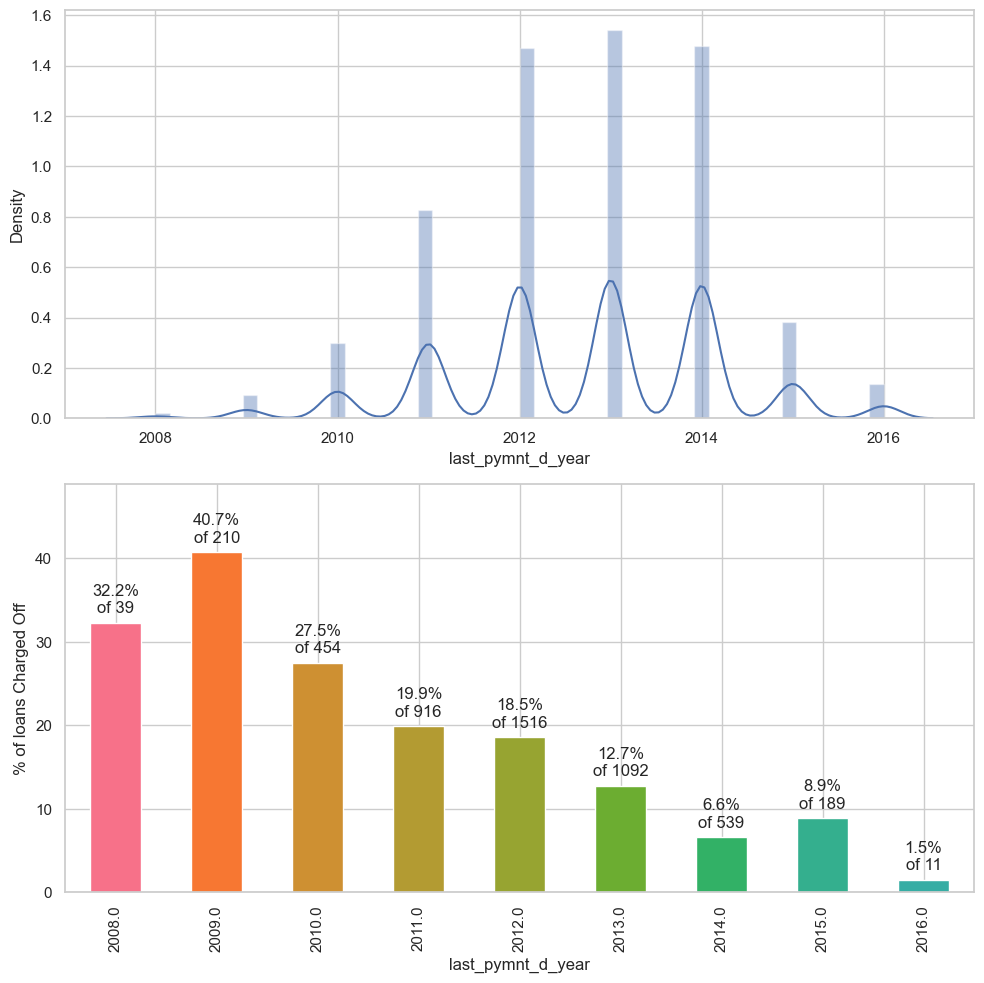

In [189]:
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
#sns.countplot(master_loan['earliest_cr_line_year'], order=sorted(master_loan.issue_d_year.unique()))
sns.distplot(master_loan['last_pymnt_d_year'])
#plt.subplot(1, 2, 2)
#sns.countplot(master_loan['earliest_cr_line_month'], order=sorted(master_loan.issue_d_month.unique()))
#plt.show()

plt.subplot(2, 1, 2)
plotLoanStatus(master_loan, 'last_pymnt_d_year')
plt.show()


**Observation:**
-  Overall, around 75% of the last payment dates are during 2012-2014 period.
-  40% of loans with a last payment date of 2009 are Charged Off. This is due to the 2008 subprime crisis. 
- This variable does not affect analysis and will be ignored. 

---
#### Variable - last_pymnt_amnt
Data_Dictionary: Last total payment amount received.

In [190]:
master_loan.last_pymnt_amnt.describe()

count    34815.000000
mean      2617.615179
std       4194.175137
min          0.000000
25%        217.645000
50%        559.730000
75%       3369.670000
max      36115.200000
Name: last_pymnt_amnt, dtype: float64

The value vary a lot. Lets conver it to log scale and plot to find trend.

In [191]:
master_loan['last_pymnt_amnt_log'] = master_loan['last_pymnt_amnt'].apply(lambda x : np.log(x+1))

C:\Users\saras\AppData\Local\Temp\ipykernel_17380\3098875138.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataframe[col])


<Figure size 1500x500 with 0 Axes>

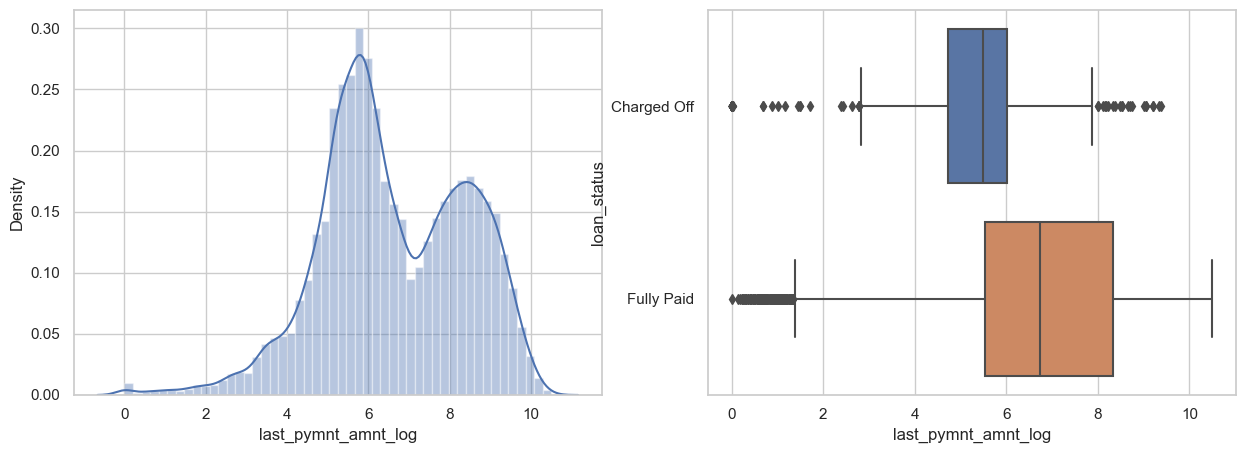

In [192]:
plt.figure(figsize=(15,5))

plot_distribution(master_loan, 'last_pymnt_amnt_log')
plt.show()

**Observation:**
-  The last Payment amount received is significantly lower for Charged Off loans as compared to the Fully Paid loans. This is expected in case of charged of loans 

---
#### Variable - last_credit_pull_d
Data_Dictionary: The most recent month LC pulled credit for this loan.

In [193]:
master_loan.last_credit_pull_d.value_counts().head()

2016-05-01    8470
2016-04-01    2139
2016-03-01    1017
2013-02-01     760
2016-02-01     660
Name: last_credit_pull_d, dtype: int64

In [194]:
master_loan['last_credit_pull_d_month']= master_loan['last_credit_pull_d'].dt.month
master_loan['last_credit_pull_d_year']= master_loan['last_credit_pull_d'].dt.year

In [195]:
master_loan.last_credit_pull_d_year.value_counts(normalize=True)

2016    0.369668
2014    0.159874
2015    0.143386
2013    0.133793
2012    0.105587
2011    0.057791
2010    0.022203
2009    0.006061
2008    0.001063
2007    0.000574
Name: last_credit_pull_d_year, dtype: float64

C:\Users\saras\AppData\Local\Temp\ipykernel_17380\1559201253.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(master_loan['last_credit_pull_d_year'])


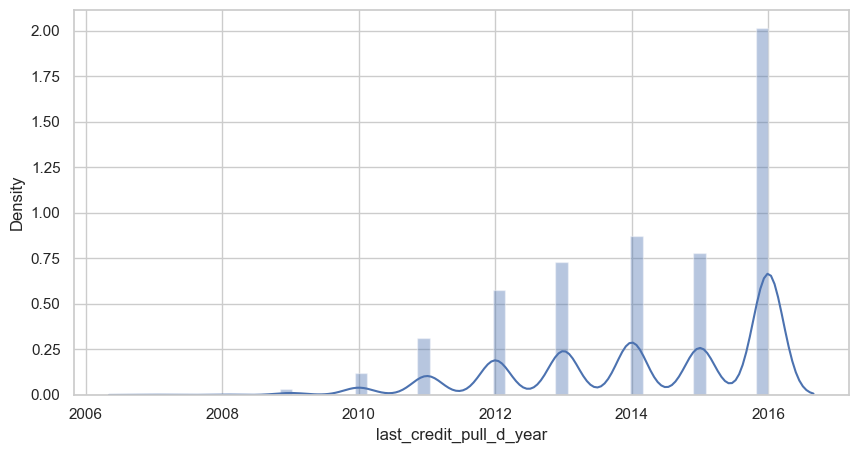

In [196]:
plt.figure(figsize=(10,5))
sns.distplot(master_loan['last_credit_pull_d_year'])
plt.show()


**Observation:**
-  Lending Club is pulling more credit reports in recent years, suggesting that the company is taking bad loans more seriously 
- This variable can be ignored in our analysis. 

--- 
#### Derived variable - ratio of loan amount to annual income 

C:\Users\saras\AppData\Local\Temp\ipykernel_17380\808190088.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(master_loan['ratio'])


<Axes: xlabel='ratio', ylabel='Density'>

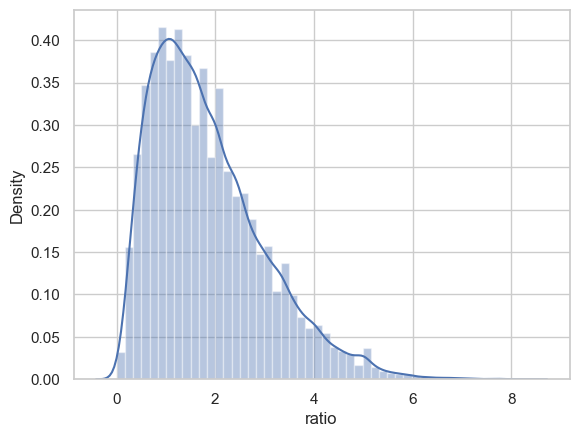

In [197]:
master_loan['ratio'] = master_loan['loan_amnt'] * 10 / master_loan['annual_inc']
sns.distplot(master_loan['ratio'])

<Axes: xlabel='ratio_bin', ylabel='% of loans Charged Off'>

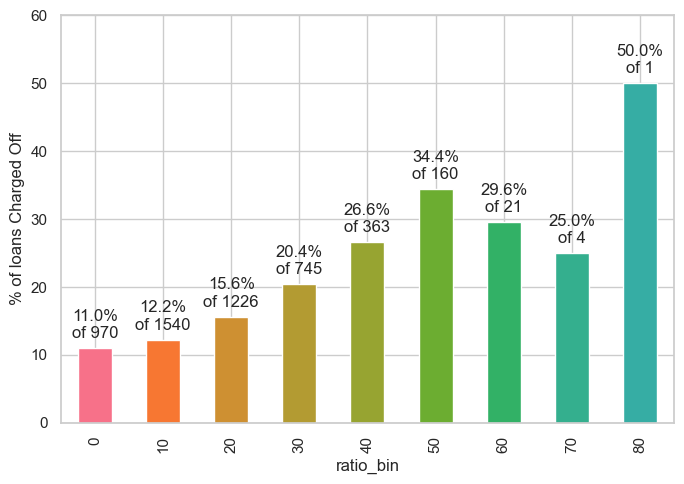

In [198]:
master_loan['ratio_bin'] = (master_loan['ratio'].astype(int)) * 10
plt.figure(figsize=(7,5))
plotLoanStatus(master_loan, 'ratio_bin')

**Observation:**
-  As long as loan amount is less than 20% of annual income, defaults are low. 
- <mark>Loan amounts of 30% of annual income or higher see a high rate of default.</mark>

### Bivariate Analysis

---
#### loan_amnt over time

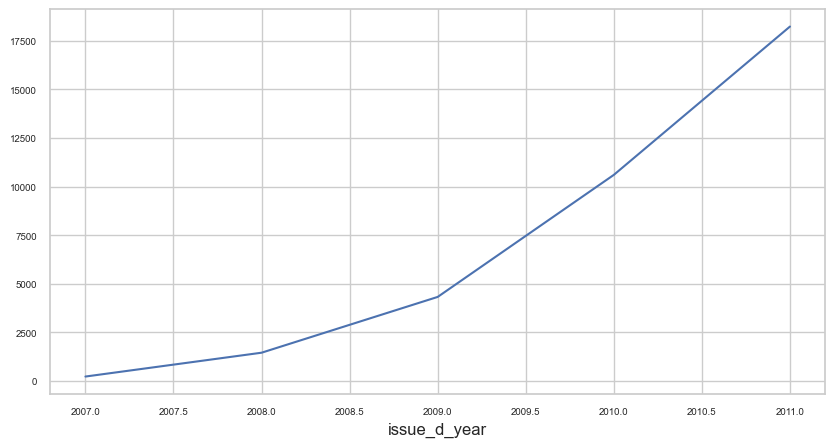

In [199]:
plt.figure(figsize=(10,5))
master_loan.groupby('issue_d_year').loan_amnt.count().plot(kind='line', fontsize=7)
plt.show()

---
#### Avg. loan_amnt over time

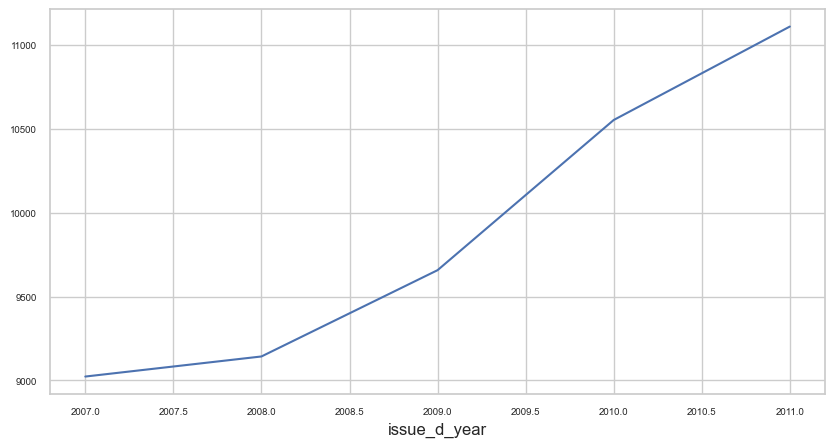

In [200]:
plt.figure(figsize=(10,5))
master_loan.groupby('issue_d_year').loan_amnt.mean().plot(kind='line', fontsize=7)
plt.show()

**Observation:**
-  Average loan amount dropped sharply when subprime mortgage crisis hit

---
####  loan_amnt and annual_inc

In [202]:
sns.jointplot('annual_inc', 'loan_amnt', master_loan.loc[master_loan['annual_inc']<260000])
plt.show()

TypeError: jointplot() takes from 0 to 1 positional arguments but 3 were given

**Observation:**
-  There are people with average income lower than 50000 taking loans of 25000 or higher. These would be risky loans. 

---
#### loan_amnt vs grade

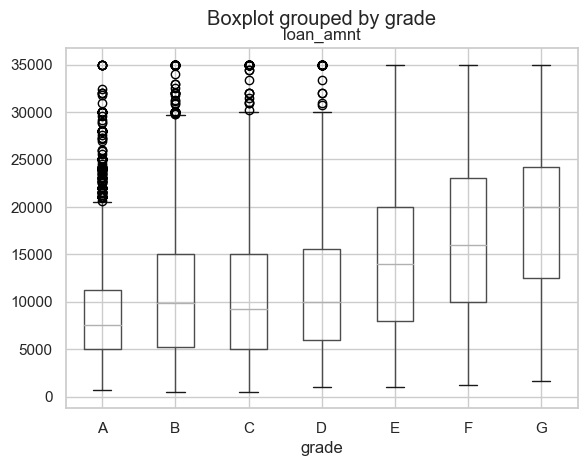

In [203]:
master_loan.boxplot(column='loan_amnt', by='grade')
plt.show()

 -  Larger loans generally appear to be given a lower grade, with the median loan amount for a grade G loan being almost 10000 higher than that of a grade A, B, or C loan.

---
##### annual income with grade

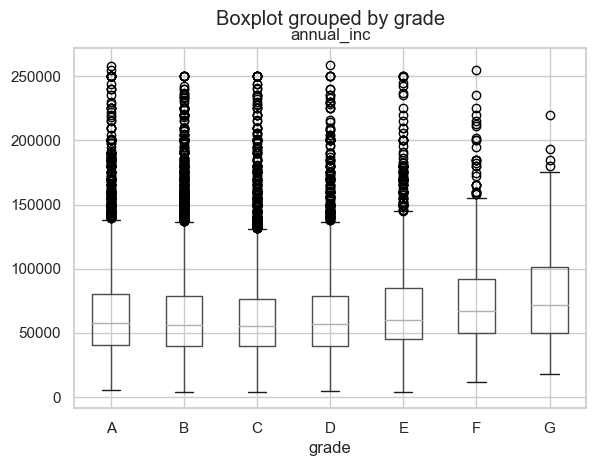

In [204]:
master_loan.loc[master_loan['annual_inc']<260000].boxplot(column='annual_inc', by='grade')
plt.show()

---
#### loan_amnt vs verification_status vs loan status

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

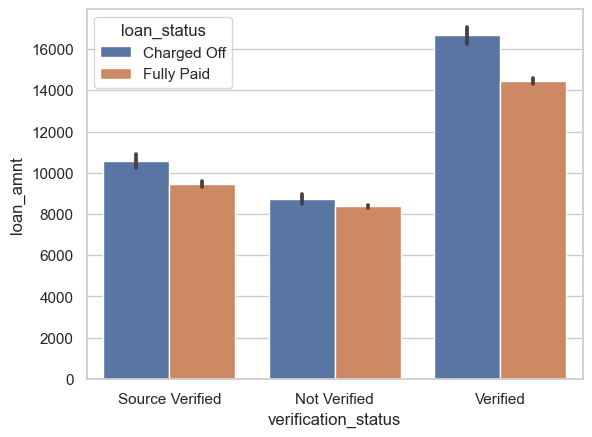

In [205]:
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=master_loan, estimator=np.mean)

**Observation:**
- Higher loan amounts are Verified more often.  
- We already know that larger loans are less in number, but see a higher charge off rate.
- <mark>This, combined with previous observation, explains why verfied loans see a higher rate of default.</mark> It's not the verified status per se, it's the fact that higher loan amounts are riskier and are also verified more often by Lending Club. 

---
#### Interest Rate and Term

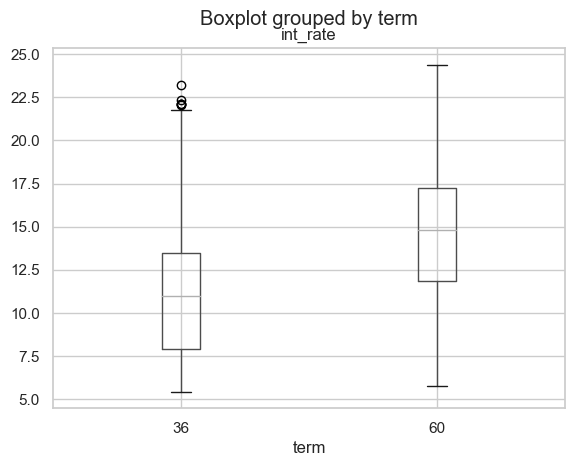

In [206]:
#master_loan.groupby('term').int_rate.mean().plot(kind='bar')
master_loan.boxplot(column='int_rate', by='term')
plt.show()

**Observation:**
-  Intrest rates are besed on term. Larger amounts were seen to be given for higher term. Ther rate of intrest associated with them is also high.

---
#### Interest Rate and Sub Grade

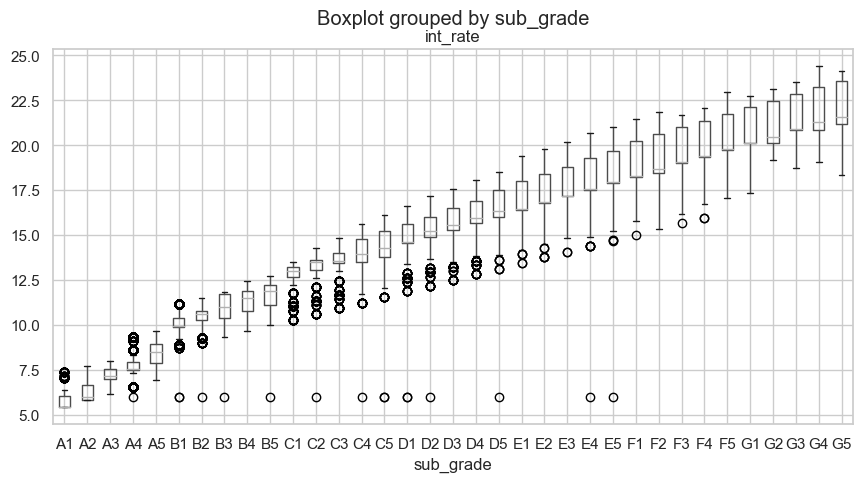

In [207]:
master_loan.boxplot(column='int_rate', by='sub_grade',figsize=(10,5))
plt.show()

**Observation:**
-  Intrest rates varies directly with the subgrade. Larger or worst the sub grade, higher are the rate of intrest for the loan.

<Axes: title={'center': 'int_rate'}, xlabel='loan_status'>

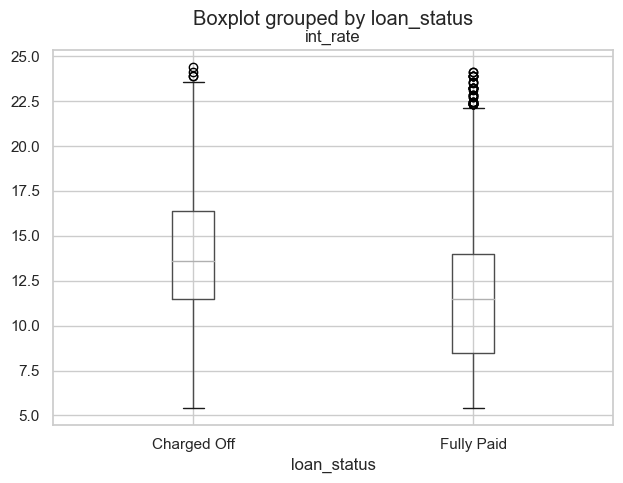

In [208]:
master_loan.boxplot(column='int_rate', by='loan_status',figsize=(7,5))

**Observation:**
- Loans at a higher intrest rate are more likely to be Charged Off.

#### Loan amount vs Grade vs Term

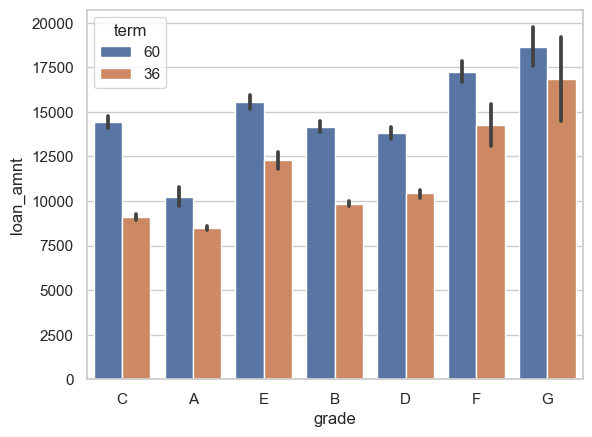

In [209]:
sns.barplot(x='grade', y='loan_amnt', hue="term", data=master_loan, estimator=np.mean)
plt.show()

**Observation:**
-  Our assumption made during univariate analysis is more evident with this plot. Higher loan amount are associated with lower grade for longer terms.

#### Loan amount Vs term Vs Loan Status


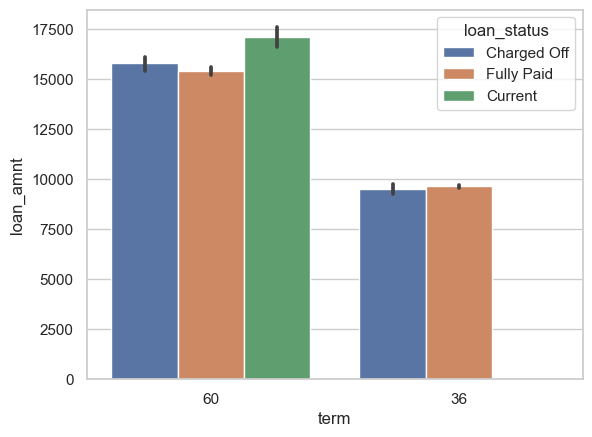

In [210]:
sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=clean_loan, estimator=np.mean)
plt.show()

**Observation:**
-  Our assumption made during univariate analysis is more evident with this plot. Higher loan amount are associated with longer terms and see higher Charge Offs.


#### revol_util Vs grade Vs Loan Status


c:\ProgramData\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
c:\ProgramData\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


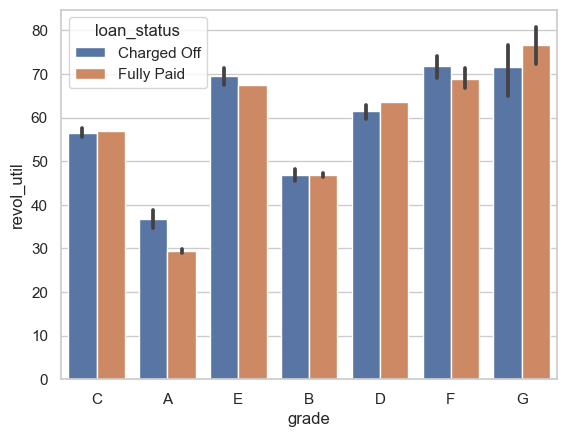

In [211]:
sns.barplot(x='grade', y='revol_util', hue="loan_status", data=master_loan, estimator=np.mean)
plt.show()

**Observation:**
-  revol_util and grade(and therefore int_rate) are correlated in some way. The revol_util is positivly correlated to the grade. As the grade goes from A to E the revol_util also increases. This may be because higer loan amounts are accosiated with higher grades.

#### Loan amount Vs addr_state vs loan Status


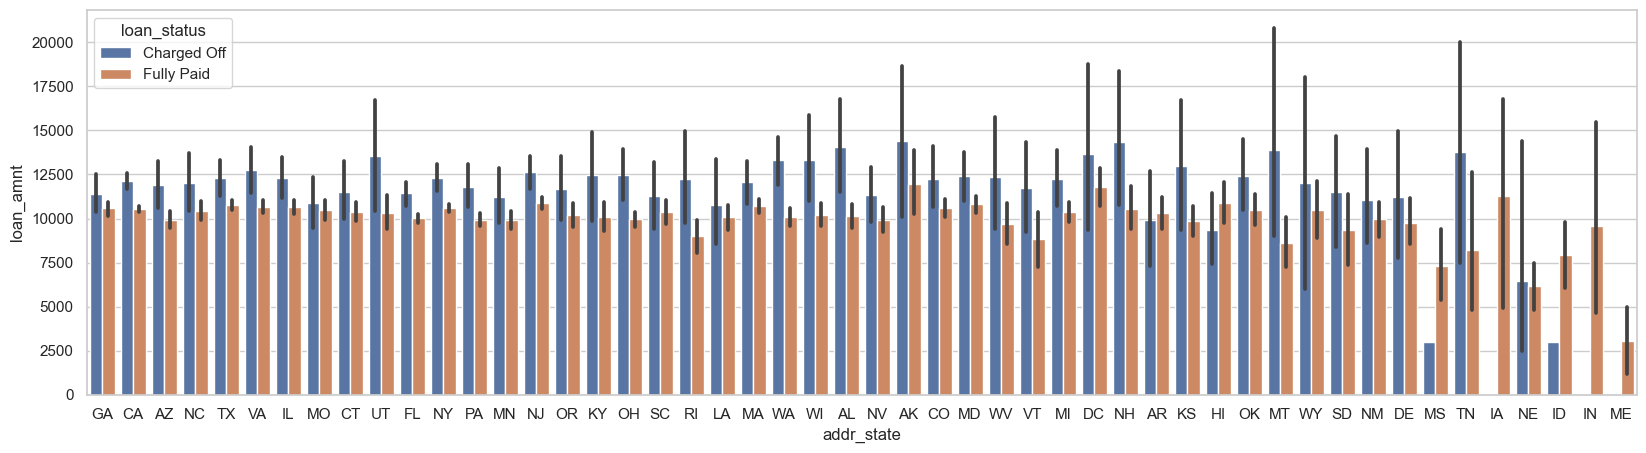

In [212]:
plt.figure(figsize=(20,5))
sns.barplot(x='addr_state', y='loan_amnt', hue='loan_status',data=master_loan, estimator=np.mean)
plt.show()

**Observation:**
-  States WY: Wyoming has the the highest average loan amount that was charged off. whats happening in this state is somthing LC can investigate into for this state.

#### revol_rate Vs int_rate

In [214]:
sns.jointplot('revol_util', 'int_rate', master_loan)

TypeError: jointplot() takes from 0 to 1 positional arguments but 3 were given

#### revol_util vs Grade

<Figure size 2000x500 with 0 Axes>

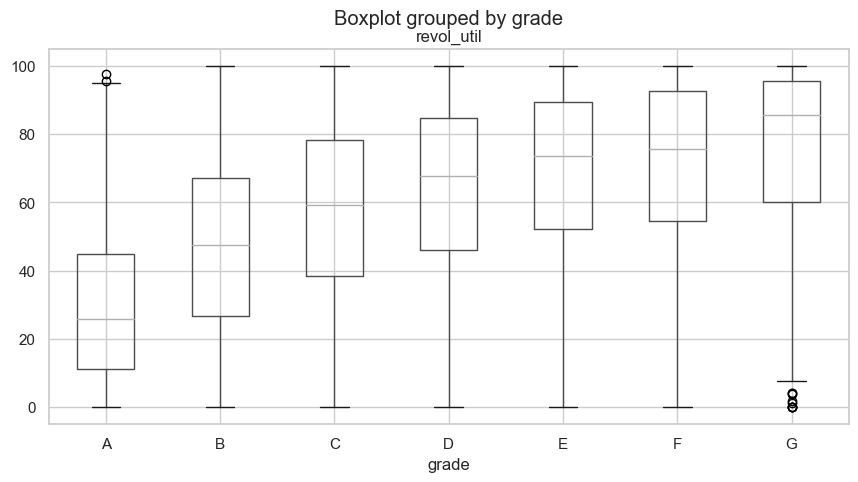

In [215]:
plt.figure(figsize=(20,5))
master_loan.boxplot(column='revol_util', by='grade',figsize=(10,5))
plt.show()

In [216]:
corr=master_loan.corr()
corr['loan_amnt']

C:\Users\saras\AppData\Local\Temp\ipykernel_17380\1150273058.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=master_loan.corr()


loan_amnt                     1.000000
int_rate                      0.265954
installment                   0.925680
emp_length                    0.139169
annual_inc                    0.224712
dti                           0.064063
delinq_2yrs                  -0.039551
inq_last_6mths                0.012695
open_acc                      0.166525
pub_rec                      -0.040105
revol_bal                     0.348015
revol_util                    0.061897
total_acc                     0.244671
last_pymnt_amnt               0.438936
collections_12_mths_ex_med         NaN
chargeoff_within_12_mths           NaN
pub_rec_bankruptcies         -0.023530
tax_liens                          NaN
earliest_cr_line_month       -0.013673
earliest_cr_line_year        -0.179216
issue_d_month                 0.047917
issue_d_year                  0.086071
interest_rate_buckets         0.266201
income_bin                    0.225798
revol_bal_log                 0.243108
revol_util_bin           

C:\Users\saras\AppData\Local\Temp\ipykernel_17380\597015710.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = master_loan[cont_var].corr()


<Axes: >

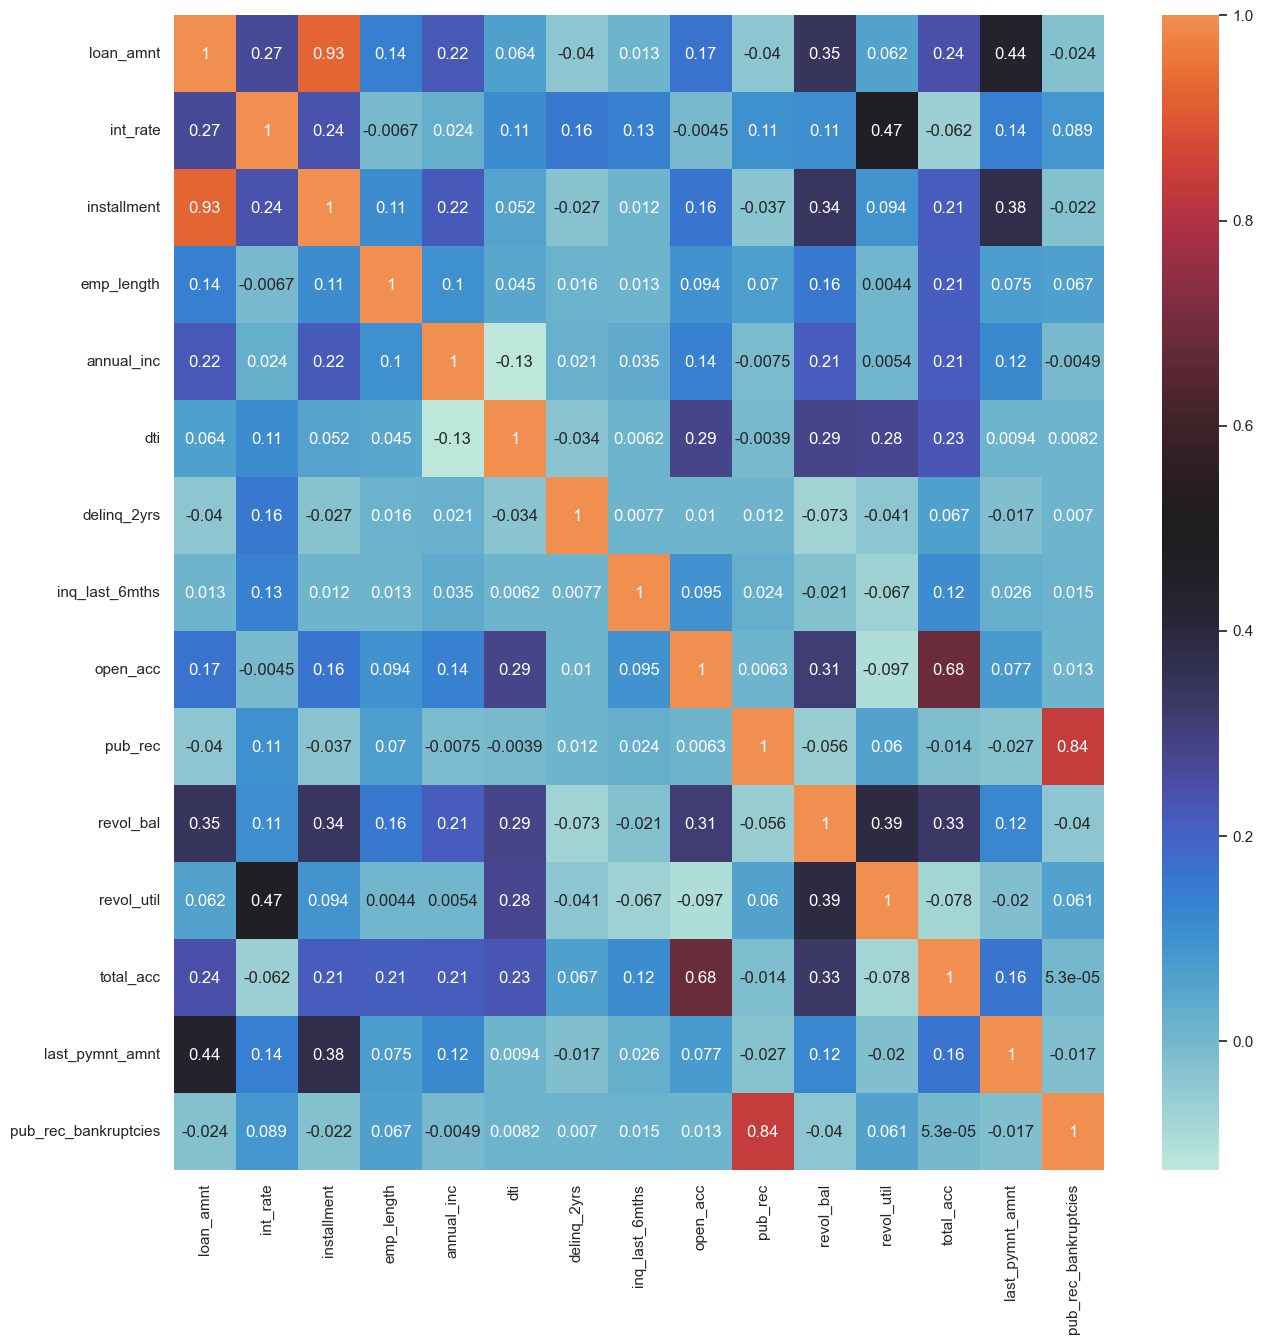

In [217]:
plt.figure(figsize=(15,15))
cont_var= ['loan_amnt', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies']
corr = master_loan[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)

**Observation:**
- loan_amnt is correlated to last_payment_amount with r factor.44, as expected
- int_rate is correlated to revol_util with r factor of .47 - This is good, as company is charging higher interest from riskier loan.
- <mark>loan_amnt revol_bal are correlated with r factor .35 - This is not good as it suggests that higher loan amount is being approved to riskier borrowers.</mark>
- delinq_2yrs is totally un-correlated with public record of bankruptcy. Therefore they represent distinct features with individual predictive value. 

In [218]:
sns.jointplot('revol_util', 'loan_amnt', master_loan)

TypeError: jointplot() takes from 0 to 1 positional arguments but 3 were given

In [219]:
sns.jointplot('int_rate', 'loan_amnt', master_loan)

TypeError: jointplot() takes from 0 to 1 positional arguments but 3 were given

####  dti vs open_acc

In [220]:
master_loan['dti_bin']
master_loan.groupby('dti_bin').int_rate.mean()

dti_bin
0-5      11.027002
5-10     11.515122
10-15    11.956157
15-20    12.300102
20-25    12.570600
25-30     9.505806
Name: int_rate, dtype: float64

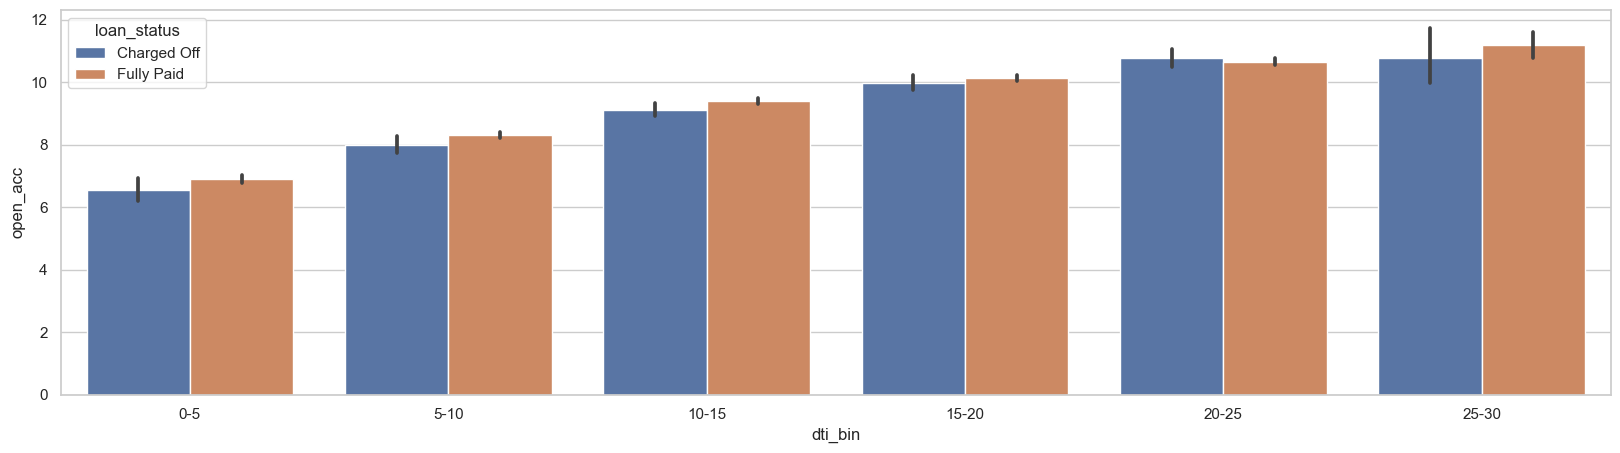

In [221]:
plt.figure(figsize=(20,5))
sns.barplot(x='dti_bin', y='open_acc', hue='loan_status',data=master_loan, estimator=np.mean)
plt.show()

**Observation:**
-  The dti increses with the number of open credit line in borrowers credit file.

####  delinq_2yr VS loan amount VS grade

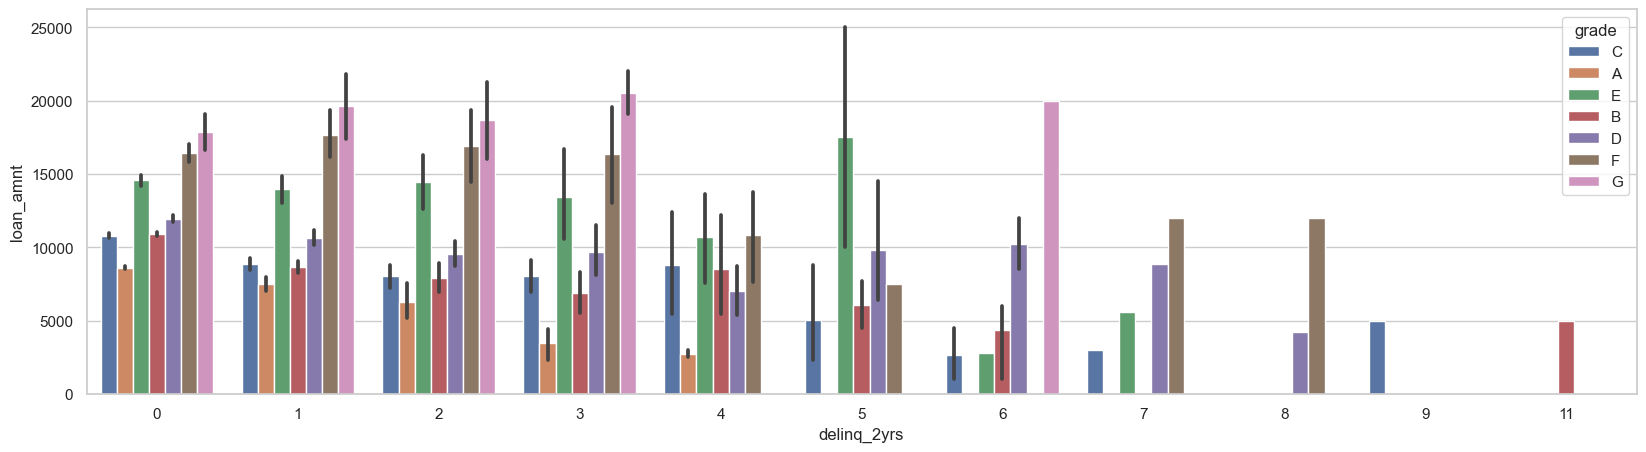

In [222]:
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='loan_amnt', hue='grade',data=master_loan, estimator=np.mean)
plt.show()

**Observation:**
-  Not many loans receive invstment with higher number of delinquencies(>3). Despite the low loan amount request, these loans are considered risky and are not invested much in.
- Lending club should further restrict their investment. We see loan amounts of >15000 on average for people having >=2 delinquencies. 

####  delinq_2yr VS int_rate  VS loan_status

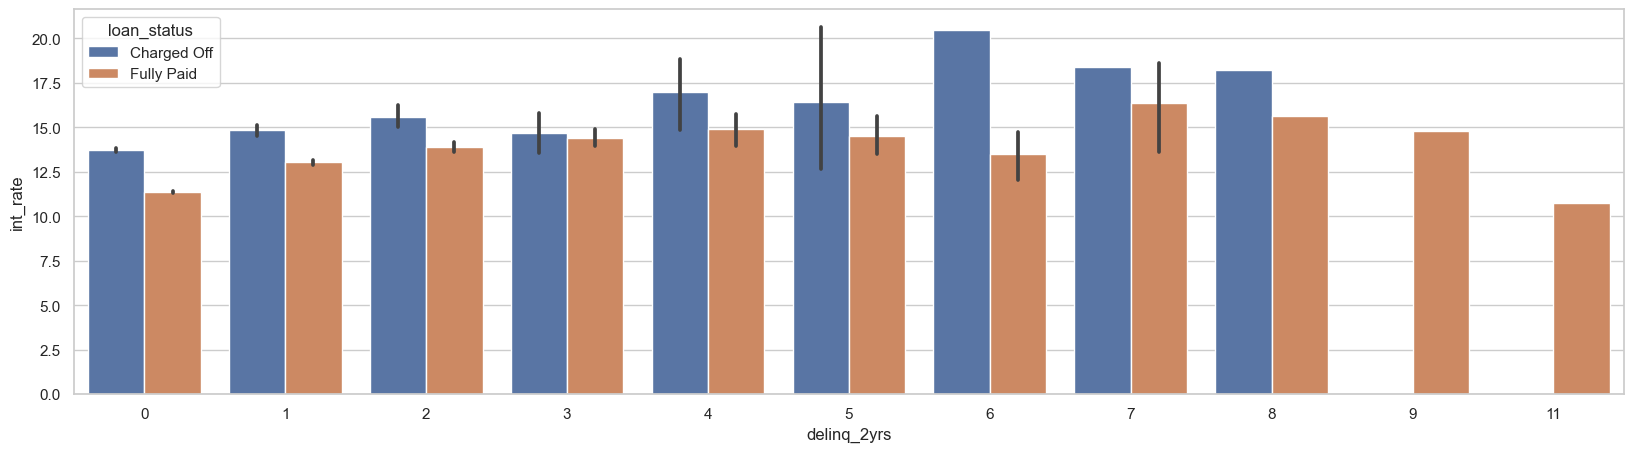

In [223]:
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='int_rate', hue='loan_status',data=master_loan, estimator=np.mean)
plt.show()

**Observation:**
- In genral, intrest rate offered inceases with the number of deliquency of the borrower.

In [224]:
sns.jointplot('loan_amnt', 'int_rate', master_loan.loc[master_loan.pub_rec_bankruptcies > 0])

TypeError: jointplot() takes from 0 to 1 positional arguments but 3 were given

In [225]:
sns.jointplot('loan_amnt', 'int_rate', master_loan.loc[master_loan.pub_rec > 0])

TypeError: jointplot() takes from 0 to 1 positional arguments but 3 were given

In [226]:
master_loan[['pub_rec', 'pub_rec_bankruptcies']].corr()

,pub_rec,pub_rec_bankruptcies
pub_rec,1.00000,0.83941
pub_rec_bankruptcies,0.83941,1.00000


In [227]:
sns.jointplot('dti', 'int_rate', master_loan)

TypeError: jointplot() takes from 0 to 1 positional arguments but 3 were given